## Molecular Signatures for Microbe-Associated Colorectal Cancers

In [1]:
# IMPORT STATEMENTS
import cv2
import re
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
import matplotlib.patches as patches
import matplotlib.colors as colors
from matplotlib.transforms import *
import PIL
import math
#get_ipython().magic('matplotlib inline')
import pandas as pd
import seaborn as sns
import json
from scipy.stats import fisher_exact, ttest_ind
from collections import Counter
from pprint import pprint
import os
import pickle
import sys
sys.path.append("/booleanfs2/sahoo/Hegemon/")
sys.path.append("/booleanfs2/sahoo/BoNE")
import bone
import StepMiner as smn
import HegemonUtil as hu
import MACS_utils as mu
acolor = ["#00CC00", "#D8A03D","#EC008C",
          'cyan', "#B741DC", "#808285",
          'blue', 'black', 'green', 'red',
          'orange', 'brown', 'pink', 'purple']

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3

/booleanfs2/sahoo/Hegemon/HegemonUtil.py:175: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (data[i] is None or data[i] is ""):


## Figure 2

**2F. Machine learning on colon tissue (normal, adenoma)**

Kanth 2016 Polyps (n = 86)
GSE76987 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP9
82 [41, 41] GSE76987 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP9 PLP9
0 [[1, 2, 3], [-3, -2, -1]]
[0, 16, 152, 130, 122, 29, 406, 1530, 775, 33, 25, 9, 36, 516, 153, 188]
[16, 152, 130]
[-3, -2, -1]
[16, 146, 116]
ROC-AUC 0.49
[107.0072532279325, 45.26168067597416, 106.5072532279325, 107.5072532279325]
20.85055974393345 107.0072532279325
1 [[1, 2, 4], [-2, -1, 1]]
[0, 16, 152, 130, 122, 29, 406, 1530, 775, 33, 25, 9, 36, 516, 153, 188]
[16, 152, 122]
[-2, -1, 1]
[16, 146, 105]
ROC-AUC 0.66
[14.246989361425108, 42.4225974335354, 13.746989361425108, 14.746989361425108]
12.521061693562098 14.246989361425108
2 [[2, 3, 4], [-2, -1, 1]]
[0, 16, 152, 130, 122, 29, 406, 1530, 775, 33, 25, 9, 36, 516, 153, 188]
[152, 130, 122]
[-2, -1, 1]
[146, 116, 105]
ROC-AUC 0.58
[42.91898881507764, 40.26428307950785, 42.41898881507764, 43.41898881507764]
24.55354812637936 42.91898881507764
3 [[

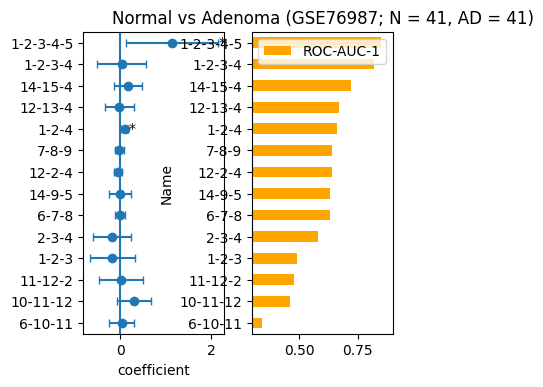

In [64]:
reload(bone)
reload(mu)
ana = mu.PolypAnalysis()
ana.getKanth2016(3)

opts = [[[1, 2, 3], [-3, -2, -1]],
        [[1, 2, 4], [-2, -1, 1]],
        [[2, 3, 4], [-2, -1, 1]],
        [[1, 2, 3, 4, 5], [-5, -0.3, 0.1, 2.9,-4]],
        [[12, 2, 4], [-2, -1, 1]],
        [[12, 13, 4], [-1, 1, 2]],
        [[11, 12, 2], [-3, -2, -1]],
        [[10, 11, 12], [-3, -2, -1]],
        [[6, 10, 11], [-3, -2, -1]],
        [[6, 7, 8], [-1, 1, 2]],
        [[7, 8, 9], [1, 2, 3]],
        [[14, 15, 4], [-1, 1, 2]],
        [[14, 9, 5], [-1, 1, 2]],
        [[1, 2, 3, 4], [-5, -0.3, 0.1, 2.9]]]
#opts = [[[i], [1]] for i in range(1, len(ng))]

res = []
for i in range(len(opts)):
    print(i, opts[i])
    genes, wt1, l1 = mu.getGeneGroups2(opts[i][0], opts[i][1], 0)
    c_dict, fpr, tpr, roc_auc = bone.processGeneGroups(ana, l1, wt1)
    res += [[c_dict, fpr, tpr, roc_auc]]

actual = [1 if ana.aval[i] >= 1 else 0 for i in ana.i1]
data_list = { 'y': actual }
for i in range(len(opts)):
    id1 = 'c' + str(i)
    c = [res[i][0][j] for j in ana.i1]
    data_list[id1] = c
df1 = pd.DataFrame(data_list)
df2 = df1.copy()
df2['c1'] = 4 * df2['c1']
df2['c3'] = 0.5 * df2['c3']
df2['c4'] = 4 * df2['c4']
df2['c9'] = 4 * df2['c9']
df2['c10'] = 4 * df2['c10']
df2 = bone.printOLS('y ~ c0 + c1 + c2 + c3 + c4 + c5 + c6 + c7 + c8 + c9 + c10 + c11 + c12 + c13', df2)
#df2 = bone.printOLS('y ~ c1 + c3 + c9', df1)
#df2 = bone.printOLS('y ~ c1 + c3 + c9', df1)
df = df2
df = df.drop(['Intercept'])
df["Name"] = ["-".join([str(i) for i in o[0]]) for o in opts]
df['ROC-AUC-1'] = [0.49, 0.66, 0.58, 0.85, 0.64, 0.67, 0.48,
                    0.46, 0.34, 0.63, 0.64, 0.72, 0.63, 0.82]
df = df.sort_values(by="ROC-AUC-1", ascending=1)
fig = plt.figure(figsize=(4,4), dpi=100)
ax = plt.subplot2grid((1, 2), (0, 0))
ax.errorbar(df["coeff"], range(len(df.index)), yerr=0,
        xerr=[list(df["coeff"] - df["lower 0.95"]),
            list(df["upper 0.95"] - df["coeff"])], fmt='o', capsize=3)
#df.plot.barh(x='Name', y='ROC-AUC-1', color='orange', ax=ax)
ax.set_yticks(range(len(df.index)))
ax.set_yticklabels(df["Name"])
ax.set_xlabel("coefficient")
ax.axvline(x=0)
#ax.set_xlim([0, 5.5])
ax.set_ylim([-0.5, len(df.index) - 0.5])
for i in range(len(df.index)):
    ax.text(df["upper 0.95"][i] + 0.02,i, df['codes'][i],
            verticalalignment='center')
ax = plt.subplot2grid((1, 2), (0, 1))
ax = df.plot.barh(x="Name", y="ROC-AUC-1", color='orange', ax=ax)
ax.set_xlim([0.3, 0.9])
ax.set_title("Normal vs Adenoma (GSE76987; N = 41, AD = 41)")
fig.savefig("results/2F-ml.pdf")

In [70]:
order = [1, 2, 3, 4, 5]
wt1 = [-5, -0.3, 0.1, 2.9, -4]
genes, wt1, l1 = mu.getGeneGroups2(order, wt1, 0)

[0, 16, 152, 130, 122, 29, 406, 1530, 775, 33, 25, 9, 36, 516, 153, 188]
[16, 152, 130, 122, 29]
[-5, -0.3, 0.1, 2.9, -4]


In [81]:
print(len(l1[4]))

29


**2G. heatmap for GSE76987 on colon tissue (normal, adenoma)**

Normal Adenoma Purged Dataset (n = 228)
GEO-Normal-Adenoma http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP33
228 [160, 68] GEO-Normal-Adenoma http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP33 PLP33
[0, 16, 152, 130, 122, 29, 406, 1530, 775, 33, 25, 9, 36, 516, 153, 188]
[16, 152, 130, 122, 29]
[-5, -0.3, 0.1, 2.9, -4]
[16, 152, 130, 122, 29]
47.979797979789545 41.79699136133116
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

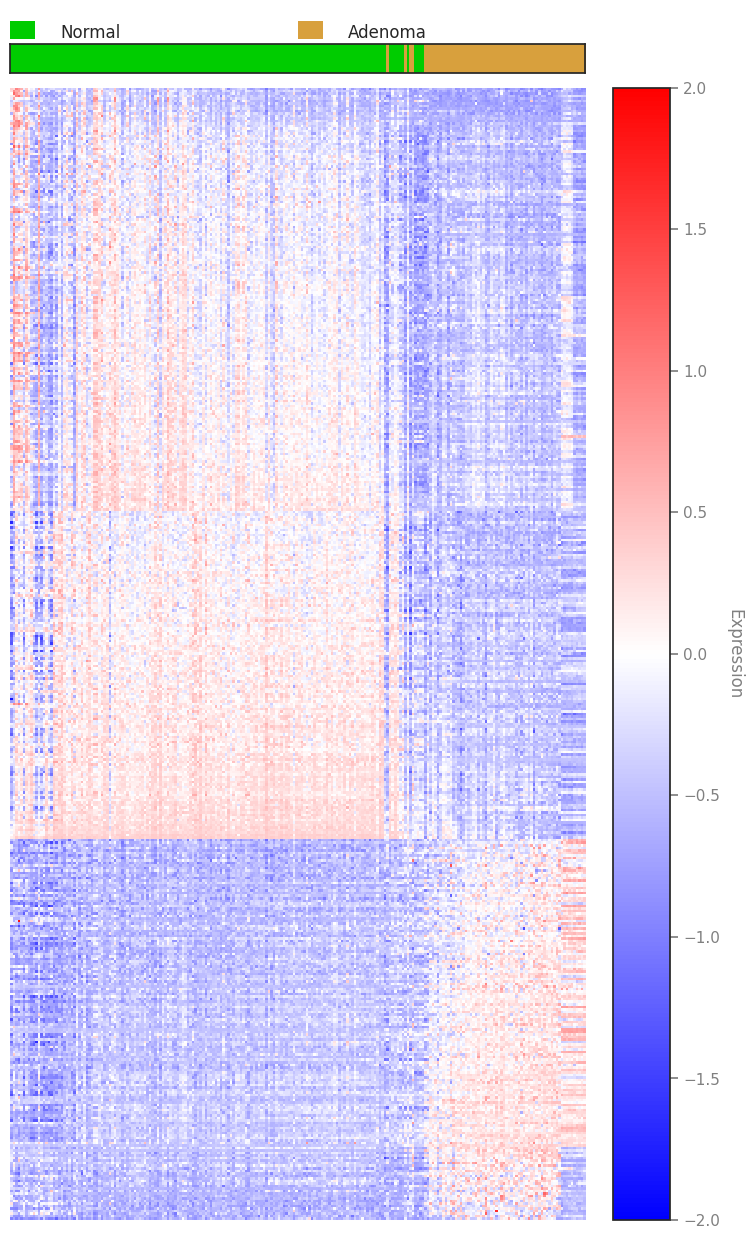

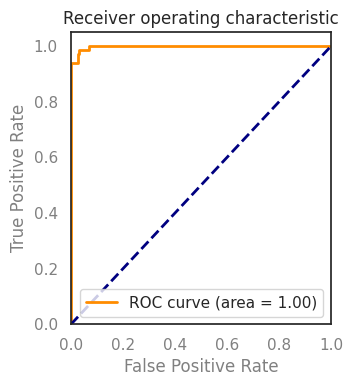

In [27]:
reload(bone)
reload(mu)

ana = mu.PolypAnalysis()
ana.getPooled()
order = [1, 2, 3, 4, 5]
wt1 = [-5, -0.3, 0.1, 2.9, -4]
genes, wt1, l1 = mu.getGeneGroups2(order, wt1, 0)

#c_dict, fpr, tpr, roc_auc = bone.processGeneGroups(ana, l1, wt1)
ana.orderData(l1, wt1)
ofile = "results/2G-heatmap-N-A.pdf"
params = {'dx': 100, 'dy': 100, 'spaceAnn': len(ana.order)/len(ana.atypes),
          'tAnn': 10, 'widthAnn':10, 'acolor' : acolor,
          'sy': 4, 'thr': 1, 'w': 8, 'h': 16, 
          'tl': 6, 'tw': 0.25, 'ts': 10, 'tsi': -200,
         'genes': genes,'acolor': acolor,
          'atypes': ana.atypes,'cval': ana.cval}
#genes = bone.readGenes("Supplementary/cluster-names.txt")
ana.printHeatmap_test(ofile, genes, params)

plt.show()

**2H. comparison of methods on colon tissue (GSE76987; normal, adenoma)**

Kanth 2016 Polyps (n = 86)
GSE76987 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP9
82 [41, 41] GSE76987 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP9 PLP9
[0, 16, 152, 130, 122, 29, 406, 1530, 775, 33, 25, 9, 36, 516, 153, 188]
[16, 152, 130, 122, 29]
[-5, -0.3, 0.1, 2.9, -4]
[16, 146, 116, 105, 27]
ROC-AUC 0.85
[-27.24662849870371, 44.80079046916536, -27.74662849870371, -26.74662849870371]
16.62919152424323 -27.24662849870371
[5, 30]
ROC-AUC 0.77
[-2.7255768602852926, 21.70895878574073, -3.2255768602852926, -2.2255768602852926]
2.45424027754676 -2.7255768602852926
2454 2883
[556, 602]
ROC-AUC 0.66
[-142.19002159004228, 27.283768987806482, -142.69002159004228, -141.69002159004228]
65.60362337878102 -142.19002159004228
[37, 39]
ROC-AUC 0.60
[-11.299891066286026, 25.570745303167513, -11.799891066286026, -10.799891066286026]
3.5674211773342144 -11.299891066286026
                            OLS Regression Results                            
Dep. Variable:     

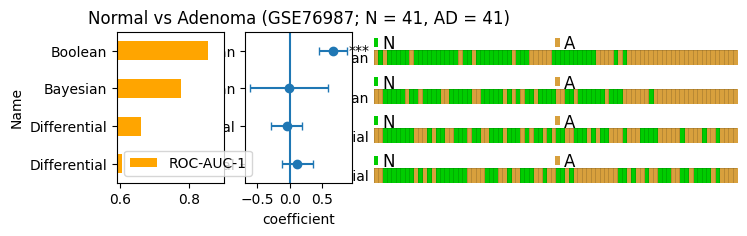

In [66]:
reload(bone)
reload(mu)
ana = mu.PolypAnalysis()
ana.getKanth2016(3)
#fig = mu.processComp(ana, 1)

fig = plt.figure(figsize=(8,2), dpi=100)
res = []

order = [1, 2, 3, 4, 5]
wt1 = [-5, -0.3, 0.1, 2.9, -4]
genes, wt1, l1 = mu.getGeneGroups2(order, wt1, 0)
c_dict, fpr, tpr, roc_auc = bone.processGeneGroups(ana, l1, wt1)
res += [[c_dict, fpr, tpr, roc_auc]]
ax = plt.subplot2grid((4, 5), (0, 2), colspan=3)
params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1,
    'widthAnn':1, 'genes': genes, 'acolor': acolor, 'ax': ax}
ax = ana.printTitleBar(params)
desc = "Boolean"
ax.text(-1, 2, desc, horizontalalignment='right',
    verticalalignment='center')

l2 = [["SLC1A2", "TCF7L2", "COL18A1", "KLF6", "OAT"],
  ['CTNNB1','AXIN2','TCF4','LEF1','EPHB2','EPHB3','HNF1A',
   'MYC','CCND1','FAT1','SP5','ZNRF3','LGR5','KIAA1199',
   'ASCL2','PPARG','RNF43','CD44','BMP7','ADRA2C','FZD7',
   'IL8','TBX3','NKD1','DKK1','DEFA6','GLUL','REG1B','SOX9',
   'TDGF1']]
wt2 = [-1, 1]
c_dict, fpr, tpr, roc_auc = bone.processGeneGroups(ana, l2, wt2)
res += [[c_dict, fpr, tpr, roc_auc]]
ax = plt.subplot2grid((4, 5), (1, 2), colspan=3)
params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1,
    'widthAnn':1, 'genes': genes, 'acolor': acolor, 'ax': ax}
ax = ana.printTitleBar(params)
desc = "Bayesian"
ax.text(-1, 2, desc, horizontalalignment='right',
    verticalalignment='center')

ifile = "Supplementary/sabates-bellver-diff.txt"
high, low = bone.getFdrStats(ifile, 1e-6, 0)
print(len(high), len(low))
l2 = [high, low]
df = pd.read_csv(ifile, sep='\t',
        names=["transcript_id", "name", "stat", "pval", "diff"])
l2 = [set(df.nlargest(857, 'stat')['name']),
           set(df.nsmallest(808, 'stat')['name'])]
wt2 = [-1, 1]
c_dict, fpr, tpr, roc_auc = bone.processGeneGroups(ana, l2, wt2)
res += [[c_dict, fpr, tpr, roc_auc]]
ax = plt.subplot2grid((4, 5), (2, 2), colspan=3)
params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1,
    'widthAnn':1, 'genes': genes, 'acolor': acolor, 'ax': ax}
ax = ana.printTitleBar(params)
desc = "Differential"
ax.text(-1, 2, desc, horizontalalignment='right',
    verticalalignment='center')

l2 = [bone.getEntries("Supplementary/lee-2006-down.txt", 0),
bone.getEntries("Supplementary/lee-2006-up.txt", 0)]
wt2 = [-1, 1]
c_dict, fpr, tpr, roc_auc = bone.processGeneGroups(ana, l2, wt2)
res += [[c_dict, fpr, tpr, roc_auc]]
ax = plt.subplot2grid((4, 5), (3, 2), colspan=3)
params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1,
    'widthAnn':1, 'genes': genes, 'acolor': acolor, 'ax': ax}
ax = ana.printTitleBar(params)
desc = "Differential"
ax.text(-1, 2, desc, horizontalalignment='right',
    verticalalignment='center')

actual = [1 if ana.aval[i] >= 1 else 0 for i in ana.i1]
data_list = { 'y': actual }
for i in range(len(res)):
    id1 = 'c' + str(i)
    c = [res[i][0][j] for j in ana.i1]
    data_list[id1] = c
df1 = pd.DataFrame(data_list)

df = bone.printOLS('y ~ c0 + c1 + c2 + c3', df1)
df = df.drop(['Intercept'])
df["Name"] = ["Boolean", "Bayesian", "Differential", "Differential"]
df['ROC-AUC-1'] = [k[3] for k in res]
df = df.reindex(index=df.index[::-1])
ax = plt.subplot2grid((1, 5), (0, 1))
ax.errorbar(df["coeff"], range(len(df.index)),
    yerr=0,
    xerr=[list(df["coeff"] - df["lower 0.95"]), list(df["upper 0.95"] - df["coeff"])],
    fmt='o', capsize=3)
ax.set_yticks(range(len(df.index)))
ax.set_yticklabels(df["Name"])
ax.set_xlabel("coefficient")
ax.axvline(x=0)
#ax.set_xlim([0, 5.5])
ax.set_ylim([-0.5, len(df.index) - 0.5])
for i in range(len(df.index)):
    ax.text(df["upper 0.95"][i] + 0.02,i, df['codes'][i], verticalalignment=
'center')
ax.set_title("Normal vs Adenoma (GSE76987; N = 41, AD = 41)")
ax = plt.subplot2grid((1, 5), (0, 0))
ax = df.plot.barh(x="Name", y="ROC-AUC-1", color='orange', ax=ax)
ax.set_xlim([0.59, 0.9])
plt.show()

**2I. test and validation barplots (normal, adenoma)**

[0, 16, 152, 130, 122, 29, 406, 1530, 775, 33, 25, 9, 36, 516, 153, 188]
[16, 152, 130, 122, 29]
[-5, -0.3, 0.1, 2.9, -4]
Normal Adenoma Purged Dataset (n = 228)
GEO-Normal-Adenoma http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP33
228 [160, 68] GEO-Normal-Adenoma http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP33 PLP33
[16, 152, 130, 122, 29]
ROC-AUC 1.00
[7.986929969847324, 301.147818856168, 7.486929969847324, 8.486929969847324]
25.118454317885732 7.986929969847324
1.00
Qu 2016 Normal Adenoma Cancer (n = 58)
GSE77953 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP50
30 [13, 17] GSE77953 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP50 PLP50
[12, 208, 123, 125, 30]
ROC-AUC 0.98
[-41.4632165706205, 33.08211079121216, -41.9632165706205, -40.9632165706205]
11.64095113022818 -41.4632165706205
0.98
Reumers 2018 Polyps Combined (n = 343)
GSE117606 GSE117607 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP65
269 [65, 204] GSE117606 GS

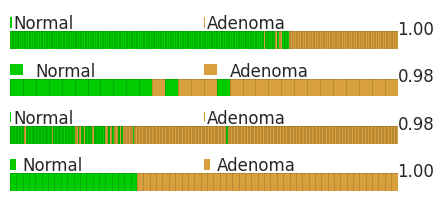

In [91]:
reload(bone)
reload(mu)
ana = mu.PolypAnalysis()

def process(ana, l1, wt1, ax, hs=1):
    if (hs == 1):
        c_dict, fpr, tpr, roc_auc = bone.processGeneGroups(ana, l1, wt1)
    else:
        c_dict, fpr, tpr, roc_auc = bone.processGeneGroupsMm(ana, l1, wt1)
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1,
        'widthAnn':1, 'acolor': acolor, 'ax': ax}
    ax = ana.printTitleBar(params)
    res = "%.2f" % roc_auc
    ax.text(len(ana.cval[0]), 4, res)
    print(res)

# Cluster 1-2-3-4-5
order = [1, 2, 3, 4, 5]
wt1 = [-5, -0.3, 0.1, 2.9, -4]
genes, wt1, l1 = mu.getGeneGroups2(order, wt1, 0)

def processAll():
    n1 = 4
    fig = plt.figure(figsize=(5,n1 * 0.6), dpi=100)
    axlist = []
    for i in range(n1):
        ax = plt.subplot2grid((n1, 1), (i, 0))
        axlist.extend([ax])

    ana.getPooled()
    process(ana, l1, wt1, axlist[0])

    ana.getQu()
    process(ana, l1, wt1, axlist[1])

    ana.getReumers()
    process(ana, l1, wt1, axlist[2])

    ana.getDruliner(2)
    process(ana, l1, wt1, axlist[3])
    
    return fig

fig = processAll()

## Figure 3

**3B. heatmap for qRT-PCR on colon tissue (healthy, non-involved, polyp)**

qPCR CRC tissues Fusoboolean 2021 (- edit) (n = 18)
 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG15
18 [3, 11, 4]  http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG15 PG15
[2, 4]
2.7173913043478546 0.6775067750677516


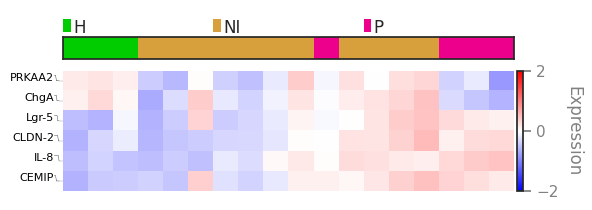

In [6]:
import bone
reload(bone)
reload(mu)
ana = mu.PolypAnalysis()
ana.getqPCR_Hs_tissue_NI_P(tn=1)

l1 = [['PRKAA2', 'ChgA'], ['IL-8', 'CLDN-2', 'CEMIP', 'Lgr-5']]
wt1 = [-1, 1]
ana.orderData(l1, wt1)

genes = ['ChgA', 'PRKAA2', 'IL-8', 'Lgr-5', 'CEMIP', 'CLDN-2']

ofile = "results/6B-heatmap-qPCR-tissue.pdf"

params = {'dx': 50, 'dy': 40, 'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': .1, 'widthAnn':.3,
          'sy': 1, 'thr': 1, 'w': 6, 'h': 6,
          'genes': genes,'acolor': acolor,
          'atypes': ana.atypes,'cval': ana.cval}

ana.params.update(params)
ax, divider = mu.plotqPCRHeatmap(ofile, (ana.data), ana.col_labels,
        ana.row_labels, ana.params)

**3D: violin plots for RNA-seq on colon tissue (1-non-involved, 2-polyp)**

[0, 16, 152, 130, 122, 29, 406, 1530, 775, 33, 25, 9, 36, 516, 153, 188]
[16, 152, 130, 122, 29]
[-5, -0.3, 0.1, 2.9, -4]
Polyp - Ribodepletion Human 2020 (n = 13)
 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG3
9 [2, 1, 2, 4]  http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG3 PG3
[15, 152, 121, 105, 27]


/Users/dtv004/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/dtv004/.local/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Polyp - Ribodepletion Human 2020 (n = 13)
 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG3
2 [1, 1]  http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG3 PG3
[15, 152, 121, 105, 27]


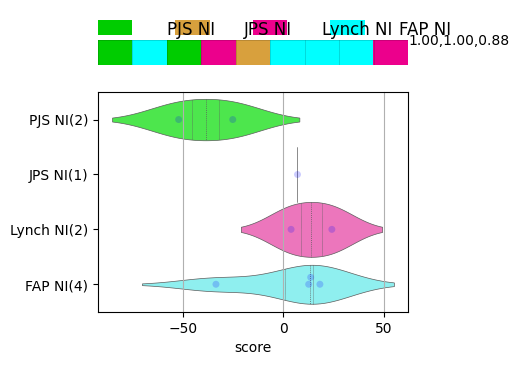

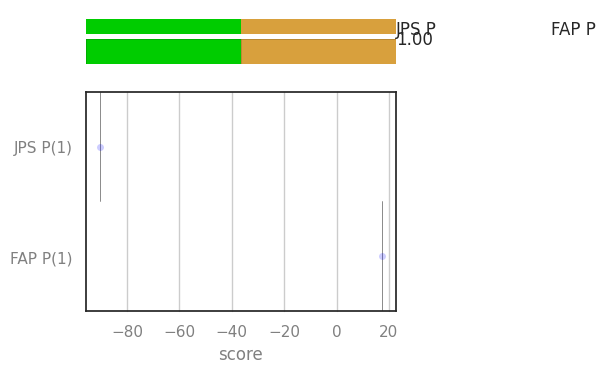

In [67]:
import bone
reload(bone)
reload(mu)

# Cluster 1-2-3-4-5
order = [1, 2, 3, 4, 5]
wt1 = [-5, -0.3, 0.1, 2.9, -4]
genes, wt1, l1 = mu.getGeneGroups2(order, wt1, 0)

# NI from PJS, JPS, Lynch, FAP
ana = mu.PolypAnalysis()
ana.getRNASeq_Hs_tissue_NI_P_data2(5)
fig = mu.processData(ana, l1, wt1, None, 1)

# JPS NI vs P
ana = mu.PolypAnalysis()
ana.getRNASeq_Hs_tissue_NI_P_data2(6)
fig = mu.processData(ana, l1, wt1, None, 1)

**3I: violin plot and heatmap for qRT-PCR on colon organoids (healthy, non-involved, polyp)**

1.87198067632852 1.3020833333333293


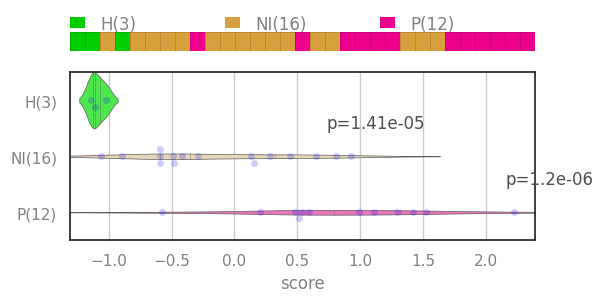

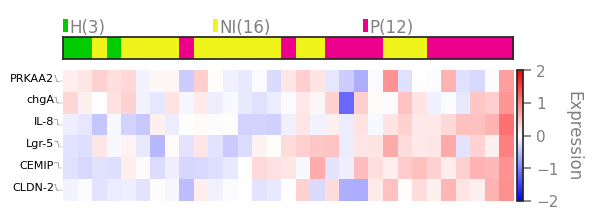

In [3]:
#pdf = bone.getPDF("results/figure-3i.pdf")
df = pd.read_csv("Supplementary/source-data-3i.txt", sep="\t")
atypes = ['H', 'NI', 'P']
ahash = {'H':0, 'NI':1, 'P':2}
lval = [[], [], []]
for k in df.index:
    lval[ahash[df['Type'][k]]] += [df['Score'][k]]
atypes = [str(atypes[i]) + "("+str(len(lval[i]))+")"
                for i in range(len(atypes))]
atype = df['Type']
aval = [ahash[k] if k in ahash else None for k in atype]
f_ranks = df['Score']
i1 = bone.np.argsort(f_ranks)
cval = bone.np.array([[aval[i] for i in i1]])
fig = bone.plt.figure(figsize=(6,3), dpi=100)
bone.plt.subplots_adjust(hspace=0.5, wspace=0.5)
ax1 = bone.plt.subplot2grid((4, 1), (0, 0))
ax2 = bone.plt.subplot2grid((4, 1), (1, 0), rowspan=3)
params = {'spaceAnn': len(atype)/len(atypes), 'tAnn': 1, 'widthAnn':1,
          'genes': [], 'ax': ax1, 'acolor': bone.acolor}
ax = bone.plotTitleBar(cval, atypes, params)
ax = bone.plotViolin(lval, atypes, {'vert':0, 'ax':ax2})
#pdf.savefig(transparent=True, bbox_inches = 'tight')


genes = ['PRKAA2', 'chgA', 'IL-8', 'Lgr-5', 'CEMIP', 'CLDN-2']
data = df[genes].T.iloc[:,i1]
col_labels = data.columns
row_labels = genes
genes = ['PRKAA2', 'chgA', 'IL-8', 'Lgr-5', 'CEMIP', 'CLDN-2']
ofile = "results/3I-heatmap-qPCR-organoid.pdf"
params = {'dx': 20, 'dy': 30, 'spaceAnn': len(atype)/len(atypes),
          'tAnn': .1, 'widthAnn':.3,
          'sy': 1, 'thr': 1, 'w': 6, 'h': 3,
          'genes': genes,
          'atypes': atypes,'cval': cval}
ax, divider = bone.plotHeatmap(ofile, data, col_labels,
        row_labels, params)
#pdf.savefig(transparent=True, bbox_inches = 'tight')
#bone.closePDF(pdf)

**3J: violin plot for RNA-seq on colon tissue (non-involved vs polyp)**

Polyp - Fusoboolean Human 2020 (n = 12)
 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG0.5
7 [3, 4]  http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG0.5 PG0.5
[0, 16, 152, 130, 122, 29, 406, 1530, 775, 33, 25, 9, 36, 516, 153, 188]
[16, 152, 130, 122, 29]
[-5, -0.3, 0.1, 2.9, -4]
[15, 152, 121, 105, 27]
[15, 152, 121, 105, 27]
[0, 16, 152, 130, 122, 29, 406, 1530, 775, 33, 25, 9, 36, 516, 153, 188]
[122]
[1]
[105]
[105]


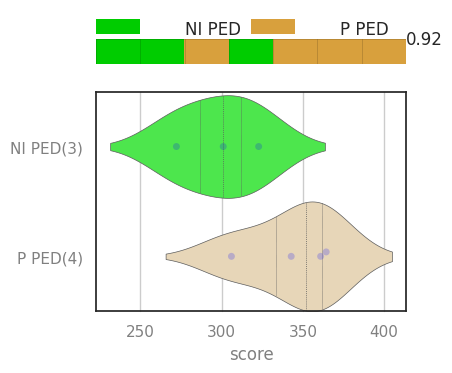

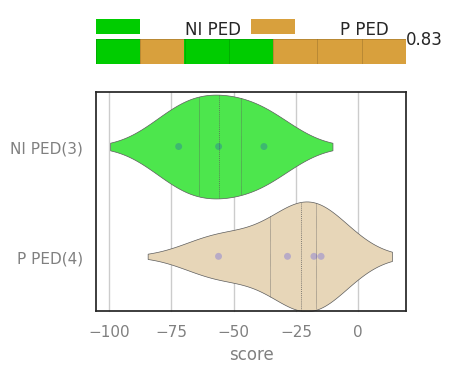

In [68]:
import bone
reload(bone)
reload(mu)
ana = mu.PolypAnalysis()
ana.getRNASeq_Hs_tissue_NI_P(6)

# Cluster 1-2-3-4-5
order = [1, 2, 3, 4, 5]
wt1 = [-5, -0.3, 0.1, 2.9, -4]
genes, wt1, l1 = mu.getGeneGroups2(order, wt1, 0)
ana.orderData(l1, wt1)
fig = mu.processData(ana, l1, wt1, None, 1)


# Cluster 4
order = [4]
wt1 = [1]
genes, wt1, l1 = mu.getGeneGroups2(order, wt1, 0)
ana.orderData(l1, wt1)
fig = mu.processData(ana, l1, wt1, None, 1)

## Figure 5

**5B: Comparison of methods for CFP vs. CAP samples**

Polyp to Cancer 2018 1 - gene (n = 79)
phs001384.v1.p1 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP62.3
15 [6, 9] phs001384.v1.p1 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP62.3 PLP62.3
[0, 16, 152, 130, 122, 29, 406, 1530, 775, 33, 25, 9, 36, 516, 153, 188]
[16, 152, 130, 122, 29]
[-5, -0.3, 0.1, 2.9, -4]
[14, 141, 113, 99, 27]
ROC-AUC 0.81
[48.89435120833436, 7.539794066203031, 48.39435120833436, 49.39435120833436]
11.422842680904337 48.89435120833436
[5, 28]
ROC-AUC 0.74
[-0.18342310448885946, 12.18404891454976, -0.6834231044888595, 0.31657689551114054]
1.4846435779511071 -0.18342310448885946
2454 2883
[539, 579]
ROC-AUC 0.76
[120.1087442288167, 9.134184713018804, 119.6087442288167, 120.6087442288167]
51.03002177740552 120.1087442288167
[36, 37]
ROC-AUC 0.28
[0.07679568763229994, 4.085140590040169, -0.42320431236770006, 0.5767956876322999]
2.3251004102679103 0.07679568763229994
                            OLS Regression Results                         

/Users/dtv004/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


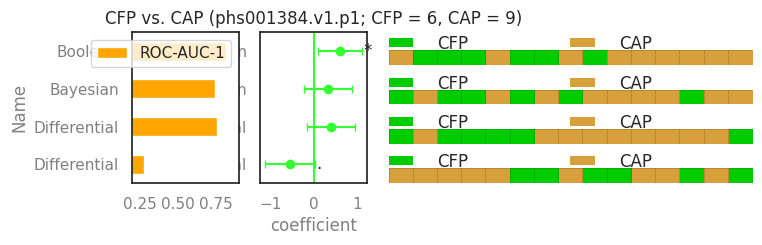

In [69]:
reload(bone)
reload(mu)
ana = mu.PolypAnalysis()
ana.getCAP()

fig = plt.figure(figsize=(8,2), dpi=100)
res = []

order = [1, 2, 3, 4, 5]
wt1 = [-5, -0.3, 0.1, 2.9, -4]
genes, wt1, l1 = mu.getGeneGroups2(order, wt1, 0)
c_dict, fpr, tpr, roc_auc = bone.processGeneGroups(ana, l1, wt1)
res += [[c_dict, fpr, tpr, roc_auc]]
ax = plt.subplot2grid((4, 5), (0, 2), colspan=3)
params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1,
    'widthAnn':1, 'genes': genes, 'acolor': acolor, 'ax': ax}
ax = ana.printTitleBar(params)
desc = "Boolean"
ax.text(-1, 2, desc, horizontalalignment='right',
    verticalalignment='center')

l2 = [["SLC1A2", "TCF7L2", "COL18A1", "KLF6", "OAT"],
  ['CTNNB1','AXIN2','TCF4','LEF1','EPHB2','EPHB3','HNF1A',
   'MYC','CCND1','FAT1','SP5','ZNRF3','LGR5','KIAA1199',
   'ASCL2','PPARG','RNF43','CD44','BMP7','ADRA2C','FZD7',
   'IL8','TBX3','NKD1','DKK1','DEFA6','GLUL','REG1B','SOX9',
   'TDGF1']]
wt2 = [-1, 1]
c_dict, fpr, tpr, roc_auc = bone.processGeneGroups(ana, l2, wt2)
res += [[c_dict, fpr, tpr, roc_auc]]
ax = plt.subplot2grid((4, 5), (1, 2), colspan=3)
params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1,
    'widthAnn':1, 'genes': genes, 'acolor': acolor, 'ax': ax}
ax = ana.printTitleBar(params)
desc = "Bayesian"
ax.text(-1, 2, desc, horizontalalignment='right',
    verticalalignment='center')

ifile = "Supplementary/sabates-bellver-diff.txt"
high, low = bone.getFdrStats(ifile, 1e-6, 0)
print(len(high), len(low))
l2 = [high, low]
df = pd.read_csv(ifile, sep='\t',
        names=["transcript_id", "name", "stat", "pval", "diff"])
l2 = [set(df.nlargest(857, 'stat')['name']),
           set(df.nsmallest(808, 'stat')['name'])]
wt2 = [-1, 1]
c_dict, fpr, tpr, roc_auc = bone.processGeneGroups(ana, l2, wt2)
res += [[c_dict, fpr, tpr, roc_auc]]
ax = plt.subplot2grid((4, 5), (2, 2), colspan=3)
params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1,
    'widthAnn':1, 'genes': genes, 'acolor': acolor, 'ax': ax}
ax = ana.printTitleBar(params)
desc = "Differential"
ax.text(-1, 2, desc, horizontalalignment='right',
    verticalalignment='center')

l2 = [bone.getEntries("Supplementary/lee-2006-down.txt", 0),
bone.getEntries("Supplementary/lee-2006-up.txt", 0)]
wt2 = [-1, 1]
c_dict, fpr, tpr, roc_auc = bone.processGeneGroups(ana, l2, wt2)
res += [[c_dict, fpr, tpr, roc_auc]]
ax = plt.subplot2grid((4, 5), (3, 2), colspan=3)
params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1,
    'widthAnn':1, 'genes': genes, 'acolor': acolor, 'ax': ax}
ax = ana.printTitleBar(params)
desc = "Differential"
ax.text(-1, 2, desc, horizontalalignment='right',
    verticalalignment='center')

actual = [1 if ana.aval[i] >= 1 else 0 for i in ana.i1]
data_list = { 'y': actual }
for i in range(len(res)):
    id1 = 'c' + str(i)
    c = [res[i][0][j] for j in ana.i1]
    data_list[id1] = c
df1 = pd.DataFrame(data_list)

df = bone.printOLS('y ~ c0 + c1 + c2 + c3', df1)
df = df.drop(['Intercept'])
df = mu.printUOLS('y', ['c0', 'c1', 'c2', 'c3'], df1)
df["Name"] = ["Boolean", "Bayesian", "Differential", "Differential"]
df['ROC-AUC-1'] = [k[3] for k in res]
df = df.reindex(index=df.index[::-1])
ax = plt.subplot2grid((1, 5), (0, 1))
ax.errorbar(df["coeff"], range(len(df.index)),
    yerr=0,
    xerr=[list(df["coeff"] - df["lower 0.95"]), list(df["upper 0.95"] - df["coeff"])],
    fmt='o', capsize=3)
ax.set_yticks(range(len(df.index)))
ax.set_yticklabels(df["Name"])
ax.set_xlabel("coefficient")
ax.axvline(x=0)
#ax.set_xlim([0, 5.5])
ax.set_ylim([-0.5, len(df.index) - 0.5])
for i in range(len(df.index)):
    ax.text(df["upper 0.95"][i] + 0.02,i, df['codes'][i], verticalalignment=
'center')
ax.set_title("CFP vs. CAP (phs001384.v1.p1; CFP = 6, CAP = 9)")
ax = plt.subplot2grid((1, 5), (0, 0))
ax = df.plot.barh(x="Name", y="ROC-AUC-1", color='orange', ax=ax)
ax.set_xlim([0.2, 0.9])
plt.show()

**5C: heatmap of CFP vs CAP using cluster 4**

Polyp to Cancer 2018 1 - gene (n = 79)
phs001384.v1.p1 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP62.3
15 [6, 9] phs001384.v1.p1 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP62.3 PLP62.3
[0, 16, 152, 130, 122, 29, 406, 1530, 775, 33, 25, 9, 36, 516, 153, 188]
[122]
[1]
[99]
4.528985507246299 2.794715447154456
[0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]
              precision    recall  f1-score   support

      Normal       0.86      1.00      0.92         6
         IBD       1.00      0.89      0.94         9

    accuracy                           0.93        15
   macro avg       0.93      0.94      0.93        15
weighted avg       0.94      0.93      0.93        15

ROC AUC 0.962962962962963
ROC AUC 0.962962962962963
Accuracy 0.9333333333333333
x      False  True 
y                  
False      6      0
True       1      8
(inf, 0.0013986013986014001)
Fisher Exact pvalue = 0.0013986013986014001


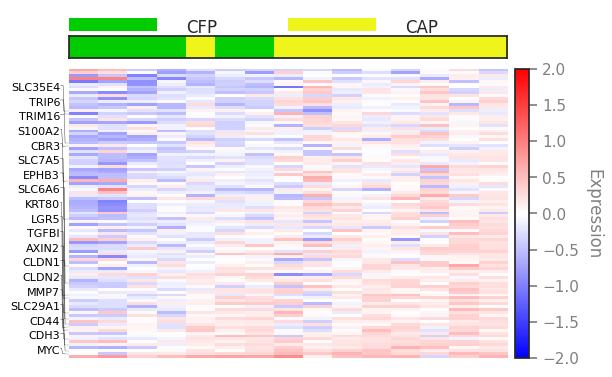

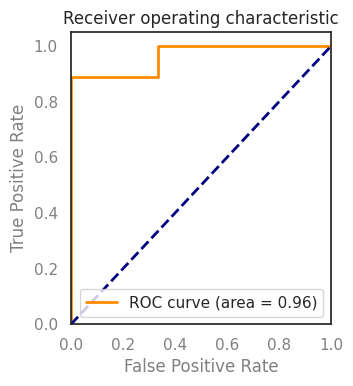

In [163]:
reload(bone)
reload(mu)
ana = mu.PolypAnalysis()
ana.getCAP()

# Cluster 4
order = [4]
wt1 = [1]
genes, wt1, l1 = mu.getGeneGroups2(order, wt1, 0)

ana.orderData(l1, wt1)
ofile = "results/5C-heatmap-CFP-CAP-C4.pdf"
params = {'dx': 100, 'dy': 10, 'spaceAnn': len(ana.order)/len(ana.atypes), 'sy': 5, 'thr': 2,
         'w': 6, 'h': 6}
genes = bone.readGenes("Supplementary/cluster-names.txt")
ana.printHeatmap2(ofile, genes, params)
plt.show()

**5D: heatmap of Control versus quiescent and neoplastic UC using cluster 4**

Pekow 2013 UC CRC (n = 20)
GSE37283 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP59
20 [5, 4, 11] GSE37283 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP59 PLP59
[0, 16, 152, 130, 122, 29, 406, 1530, 775, 33, 25, 9, 36, 516, 153, 188]
[122]
[1]
[255]
9.057971014492598 7.19850948509477
[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
              precision    recall  f1-score   support

      Normal       0.80      0.89      0.84         9
         IBD       0.90      0.82      0.86        11

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.86      0.85      0.85        20

ROC AUC 0.8686868686868687
ROC AUC 0.8686868686868687
Accuracy 0.85
x      False  True 
y                  
False      8      1
True       2      9
(36.0, 0.005477494641581316)
Fisher Exact pvalue = 0.005477494641581316


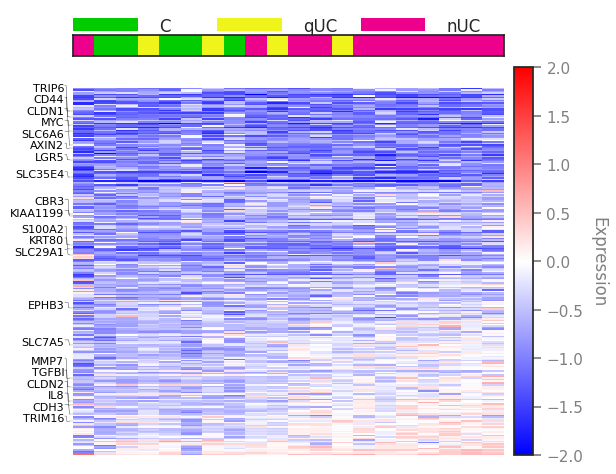

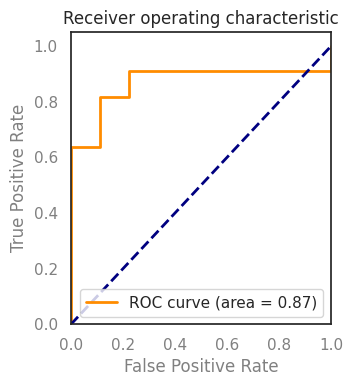

In [164]:
reload(bone)
reload(mu)
ana = mu.PolypAnalysis()
ana.getPekow()

# Cluster 4
order = [4]
wt1 = [1]
genes, wt1, l1 = mu.getGeneGroups2(order, wt1, 0)

ana.orderData(l1, wt1)
ofile = "results/5D-heatmap-UC.pdf"
params = {'dx': 150, 'dy': 10, 'spaceAnn': len(ana.order)/len(ana.atypes), 'sy': 8, 'thr': 0,
         'w': 6, 'h': 6,
         'actual': [1 if ana.aval[i] >= 2 else 0 for i in ana.i1]}
genes = bone.readGenes("Supplementary/cluster-names.txt")
ana.printHeatmap(ofile, genes, params)
plt.show()

**5E: heatmap of FN-infected or uninfected Caco2 monolayers and FN-infected tumors vs. adjacent normal tissues**

Jia 2017 F. nucleatum Caco2 RMA (n = 10)
GSE102573 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC112.2
10 [5, 5] GSE102573 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC112.2 CRC112.2
[0, 16, 152, 130, 122, 29, 406, 1530, 775, 33, 25, 9, 36, 516, 153, 188]
[16, 152, 130, 122, 29]
[-5, -0.3, 0.1, 2.9, -4]
6.0386473429950644 5.787037037036989
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         5
         IBD       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

ROC AUC 1.0
ROC AUC 1.0
Accuracy 1.0
x      False  True 
y                  
False      5      0
True       0      5
(inf, 0.007936507936507929)
Fisher Exact pvalue = 0.007936507936507929


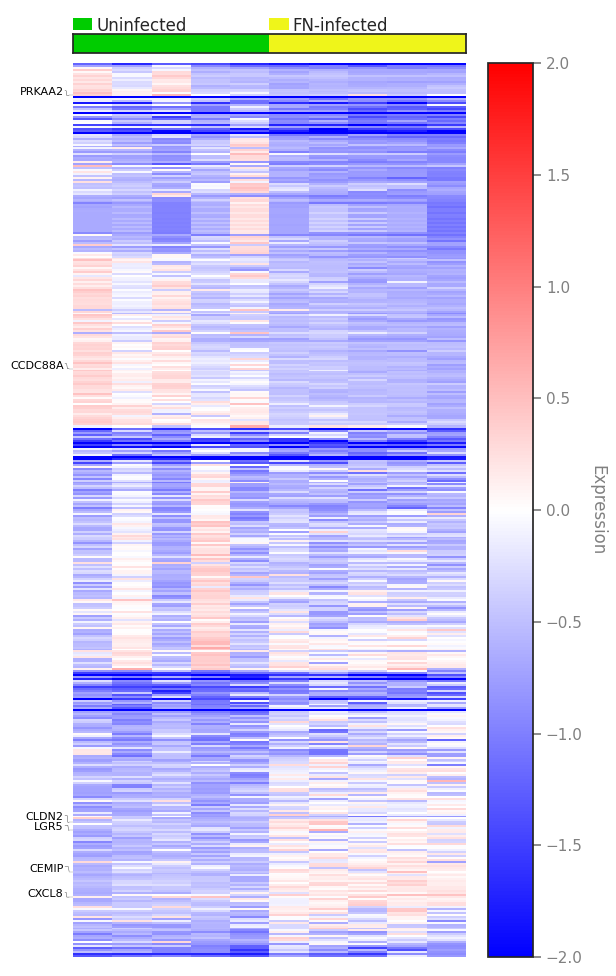

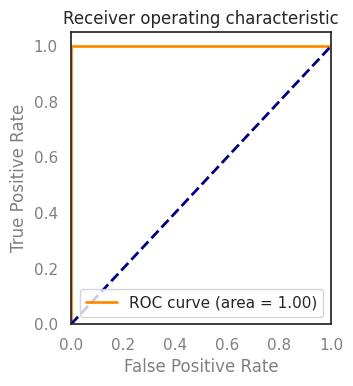

In [19]:
reload(bone)
reload(mu)
ana = mu.PolypAnalysis()
ana.getFuso1()

# Cluster 1-2-3-4-5
order = [1, 2, 3, 4, 5]
wt1 = [-5, -0.3, 0.1, 2.9, -4]
genes, wt1, l1 = mu.getGeneGroups2(order, wt1, 0)
l1[3].add('CEMIP')
l1[3].add('CXCL8')

genes = ['CCDC88A', 'PRKAA2', 'CXCL8', 'LGR5', 'CEMIP', 'CLDN2']

ana.orderData2(l1, wt1)
ofile = "results/5E-heatmap-FN-caco2.pdf"
params = {'dx': 200, 'dy': 10, 'spaceAnn': len(ana.order)/len(ana.atypes), 'widthAnn': 0.5, 'tAnn': 0.1,
          'sy': 5, 'thr': 0, 'w': 6, 'h': 12}
ana.printHeatmap3(ofile, genes, params)
plt.show()

Castellarin 2012 F. nucleatum (n = 24)
SRP007584 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC114
18 [9, 9] SRP007584 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC114 CRC114
[0, 16, 152, 130, 122, 29, 406, 1530, 775, 33, 25, 9, 36, 516, 153, 188]
[16, 152, 130, 122, 29]
[-5, -0.3, 0.1, 2.9, -4]
10.869565217391116 5.303724053724036
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]
              precision    recall  f1-score   support

      Normal       0.90      1.00      0.95         9
         IBD       1.00      0.89      0.94         9

    accuracy                           0.94        18
   macro avg       0.95      0.94      0.94        18
weighted avg       0.95      0.94      0.94        18

ROC AUC 1.0
ROC AUC 1.0
Accuracy 0.9444444444444444
x      False  True 
y                  
False      9      0
True       1      8
(inf, 0.0004113533525298235)
Fisher Exact pvalue = 0.0004113533525298235

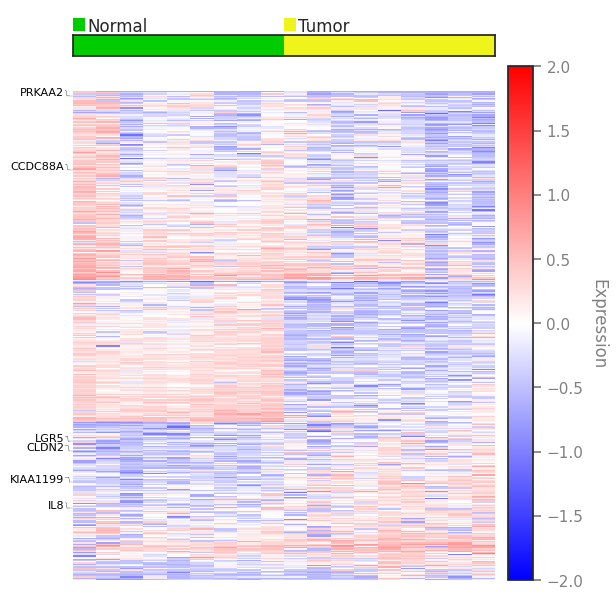

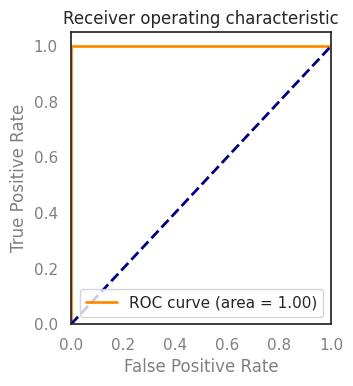

In [18]:
reload(bone)
reload(mu)
ana = mu.PolypAnalysis()
ana.getFuso2()

# Cluster 1-2-3-4-5
order = [1, 2, 3, 4, 5]
wt1 = [-5, -0.3, 0.1, 2.9, -4]
genes, wt1, l1 = mu.getGeneGroups2(order, wt1, 0)

genes = ['CCDC88A', 'PRKAA2', 'IL8', 'LGR5', 'CEMIP', 'KIAA1199','CLDN2']

ana.orderData2(l1, wt1)
ofile = "results/5E-heatmap-FN-colon.pdf"
params = {'dx': 200, 'dy': 10, 'spaceAnn': len(ana.order)/len(ana.atypes), 'widthAnn': 0.5, 'tAnn': 0.1,
          'sy': 5, 'thr': 0, 'w': 6, 'h': 12}
ana.printHeatmap3(ofile, genes, params)
plt.show()

**5F: violin plot and heatmap of WT mouse vs EDMs**

qPCR APC min Fusoboolean 2021 (- edit) (n = 47)
 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG14
14 [3, 3, 4, 4]  http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG14 PG14
[2, 4]
[2, 4]
2.1135265700483052 0.846883468834688


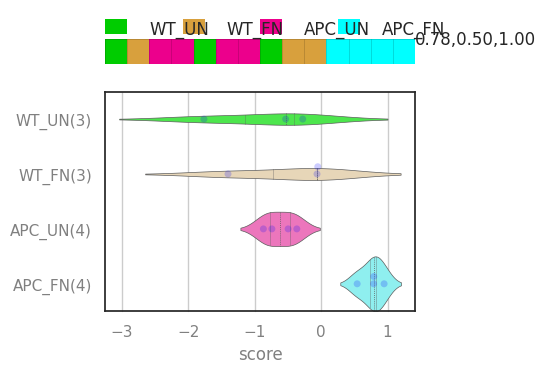

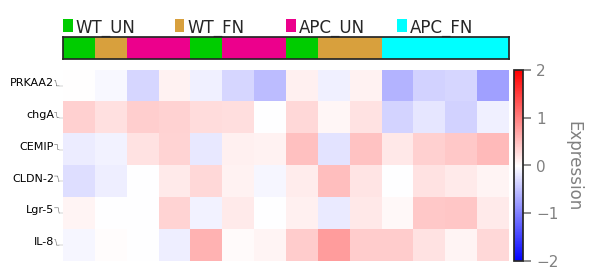

In [10]:
import bone
reload(bone)
reload(mu)
ana = mu.PolypAnalysis()
ana.getqPCR_WT_APC_Inf(tn=7)

l1 = [['PRKAA2', 'chgA'], ['IL-8', 'CLDN-2', 'CEMIP', 'Lgr-5']]
wt1 = [-1, 1]
ana.orderData(l1, wt1)
fig = mu.processData(ana, l1, wt1, None, 1)

genes = ['chgA', 'PRKAA2', 'IL-8', 'Lgr-5', 'CEMIP', 'CLDN-2']
ofile = "results/5F-heatmap-qPCR-mouse.pdf"

params = {'dx': 50, 'dy': 50, 'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': .1, 'widthAnn':.3,
          'sy': 1, 'thr': 1, 'w': 6, 'h': 6,
          'genes': genes,
          'atypes': ana.atypes,'cval': ana.cval}

ana.params.update(params)
#ax, divider = bone.plotHeatmap(ofile, ana.data, ana.col_labels,
ax, divider = mu.plotqPCRHeatmap(ofile, (ana.data+0.5), ana.col_labels,
        ana.row_labels, ana.params)

## Supplementary Figure 1

**Validation barplots for C1-2-3-4-5**

[0, 16, 152, 130, 122, 29, 406, 1530, 775, 33, 25, 9, 36, 516, 153, 188]
[16, 152, 130, 122, 29]
[-5, -0.3, 0.1, 2.9, -4]
Normal Adenoma Purged Dataset (n = 228)
GEO-Normal-Adenoma http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP33
228 [160, 68] GEO-Normal-Adenoma http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP33 PLP33
[16, 152, 130, 122, 29]
ROC-AUC 1.00
[7.986929969847324, 301.1478188561679, 7.486929969847324, 8.486929969847324]
25.11845431788573 7.986929969847324
1.00
Qu 2016 Normal Adenoma Cancer (n = 58)
GSE77953 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP50
30 [13, 17] GSE77953 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP50 PLP50
[12, 208, 123, 125, 30]
ROC-AUC 0.98
[-41.4632165706205, 33.08211079121233, -41.9632165706205, -40.9632165706205]
11.640951130228173 -41.4632165706205
0.98
Reumers 2018 Polyps Combined (n = 343)
GSE117606 GSE117607 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP65
269 [65, 204] GSE117606 G

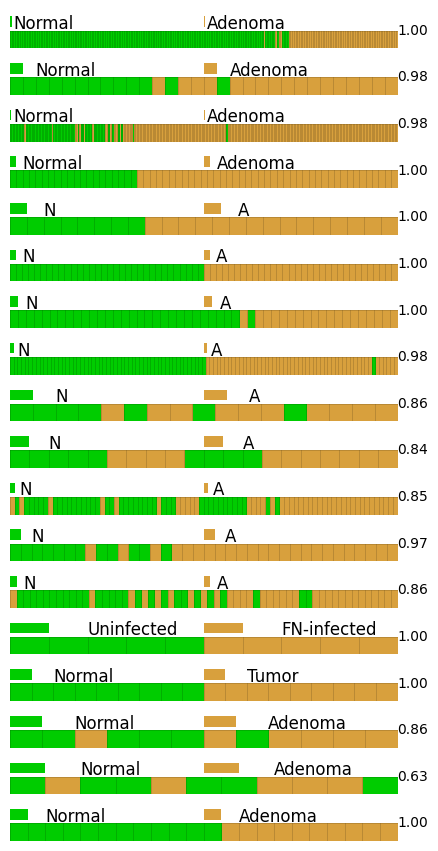

In [22]:
reload(bone)
reload(mu)
ana = mu.PolypAnalysis()

def process(ana, l1, wt1, ax, hs=1):
    if (hs == 1):
        c_dict, fpr, tpr, roc_auc = bone.processGeneGroups(ana, l1, wt1)
    else:
        c_dict, fpr, tpr, roc_auc = mu.processGeneGroupsMm(ana, l1, wt1)
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1,
        'widthAnn':1, 'acolor': acolor, 'ax': ax}
    ax = ana.printTitleBar(params)
    res = "%.2f" % roc_auc
    ax.text(len(ana.cval[0]), 4, res)
    print(res)

# Cluster 1-2-3-4-5
order = [1, 2, 3, 4, 5]
wt1 = [-5, -0.3, 0.1, 2.9, -4]
genes, wt1, l1 = mu.getGeneGroups2(order, wt1, 0)

def processAll():
    n1 = 18
    fig = plt.figure(figsize=(5,n1 * 0.6), dpi=100)
    axlist = []
    for i in range(n1):
        ax = plt.subplot2grid((n1, 1), (i, 0))
        axlist.extend([ax])

    ana.getPooled()
    process(ana, l1, wt1, axlist[0])

    ana.getQu()
    process(ana, l1, wt1, axlist[1])

    ana.getReumers()
    process(ana, l1, wt1, axlist[2])

    ana.getDruliner(2)
    process(ana, l1, wt1, axlist[3])

    ana.getGalamb2008(2)
    process(ana, l1, wt1, axlist[4])

    ana.getSabatesBellver2007(2)
    process(ana, l1, wt1, axlist[5])

    ana.getLaPointe2010(2)
    process(ana, l1, wt1, axlist[6])

    ana.getSheffer2012(2)
    process(ana, l1, wt1, axlist[7])

    ana.getFujii2017(2)
    process(ana, l1, wt1, axlist[8])

    ana.getFessler2016(2)
    process(ana, l1, wt1, axlist[9])

    ana.getKanth2016(3)
    process(ana, l1, wt1, axlist[10])

    ana.getThiruvengadam2018(2)
    process(ana, l1, wt1, axlist[11])

    ana.getDelker2018(3)
    process(ana, l1, wt1, axlist[12])

    ana.getFuso1()
    process(ana, l1, wt1, axlist[13])

    ana.getFuso2()
    process(ana, l1, wt1, axlist[14])

    ana.getLeclerc()
    process(ana, l1, wt1, axlist[15], 0)

    ana.getPaoni()
    process(ana, l1, wt1, axlist[16], 0)

    ana.getBelmont()
    process(ana, l1, wt1, axlist[17], 0)

    return fig

fig = processAll()

## Supplementary Figure 2

**Heatmap of pooled normal and adenoma samples for C1-2-3-4-5**

Normal Adenoma Purged Dataset (n = 228)
GEO-Normal-Adenoma http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP33
228 [160, 68] GEO-Normal-Adenoma http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP33 PLP33
[0, 16, 152, 130, 122, 29, 406, 1530, 775, 33, 25, 9, 36, 516, 153, 188]
[16, 152, 130, 122, 29]
[-5, -0.3, 0.1, 2.9, -4]
47.979797979789545 41.79699136133116
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

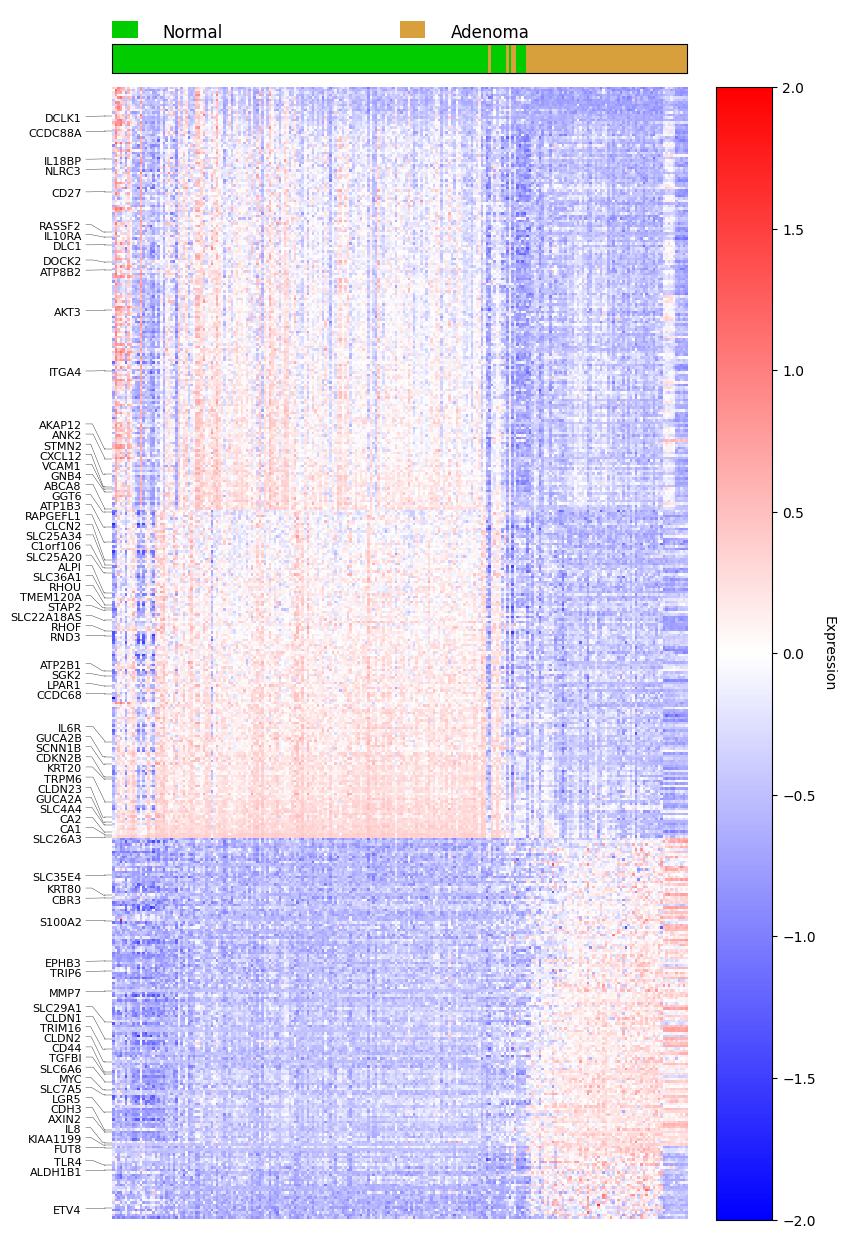

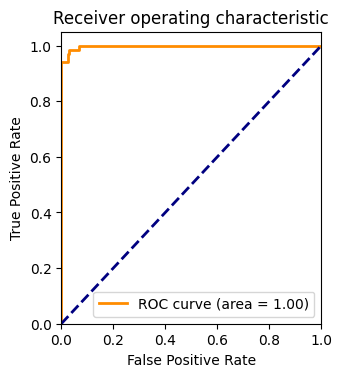

In [2]:
reload(bone)
reload(mu)
ana = mu.PolypAnalysis()
ana.getPooled()

# Cluster 1-2-3-4
order = [1, 2, 3, 4, 5]
wt1 = [-5, -0.3, 0.1, 2.9, -4]
genes, wt1, l1 = mu.getGeneGroups2(order, wt1, 0)

ana.orderData2(l1, wt1)
ofile = "results/S2-heatmap-N-A.pdf"
params = {'dx': 100, 'dy': 100, 'spaceAnn': len(ana.order)/len(ana.atypes),
          'tAnn': 10, 'widthAnn':10, 'acolor' : acolor,
          'sy': 4, 'thr': 1, 'w': 8, 'h': 16, 
          'tl': 6, 'tw': 0.25, 'ts': 10, 'tsi': -200,
         'genes': genes,'acolor': acolor,
          'atypes': ana.atypes,'cval': ana.cval}
ana.row_labels = [list(ana.h.getIDs(k).keys())[0] for k in ana.row_labels]
ana.printHeatmap3(ofile, genes, params)
plt.show()

## Supplementary Figure 3

**Heatmap of validation cohort 1: phs001384.v1.p1 with C1-2-3-4-5**

Polyp to Cancer 2018 1 - gene (n = 79)
phs001384.v1.p1 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP62.3
61 [20, 10, 31] phs001384.v1.p1 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP62.3 PLP62.3
[0, 16, 152, 130, 122, 29, 406, 1530, 775, 33, 25, 9, 36, 516, 153, 188]
[16, 152, 130, 122, 29]
[-5, -0.3, 0.1, 2.9, -4]
3.9963312368972015 5.011192511192476
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        20
         IBD       1.00      1.00      1.00        41

    accuracy                           1.00        61
   macro avg       1.00      1.0

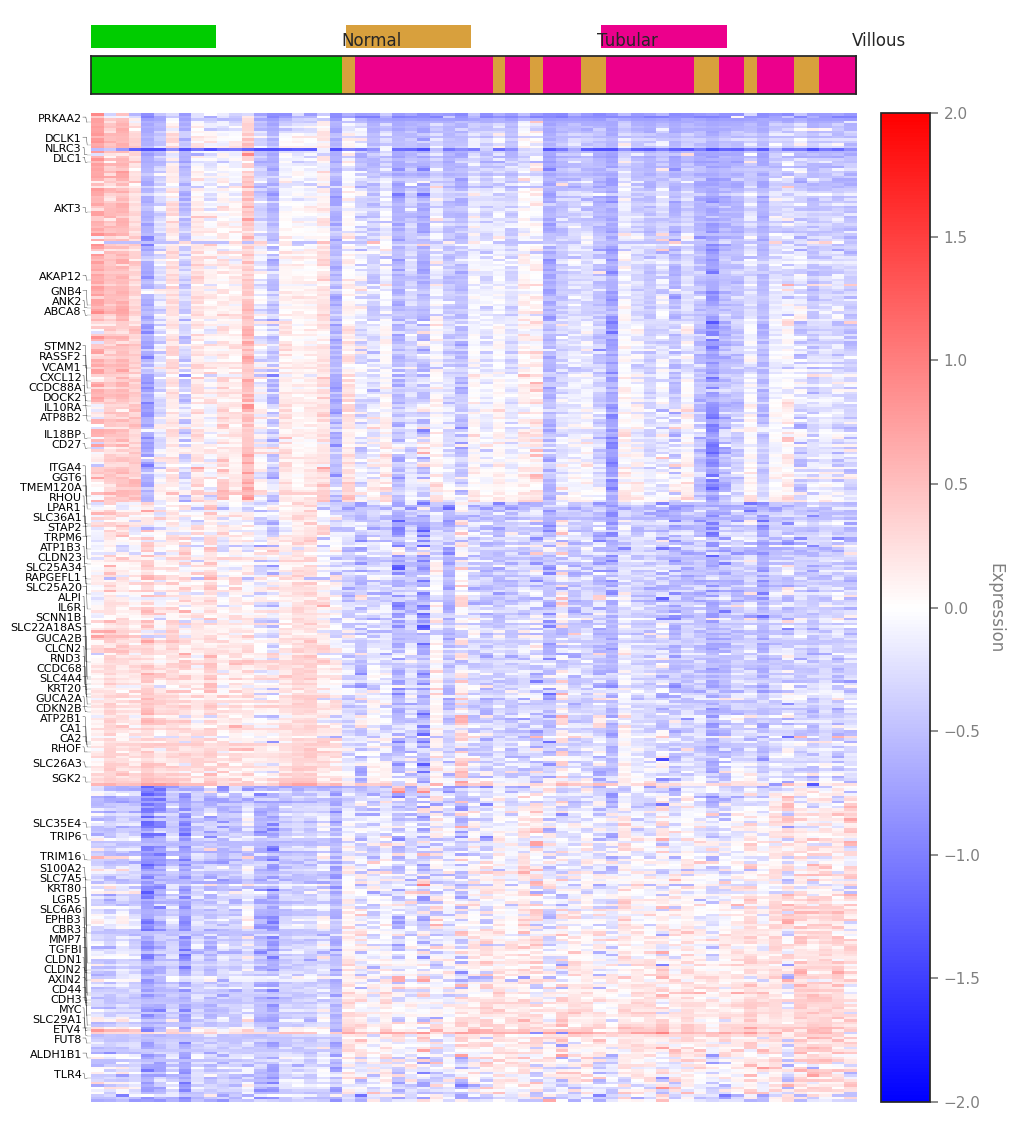

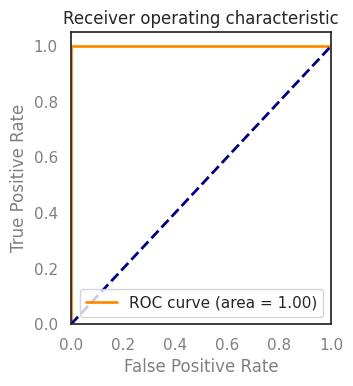

In [42]:
reload(bone)
reload(mu)
ana = mu.PolypAnalysis()
ana.getDruliner()

# Cluster 1-2-3-4-5
order = [1, 2, 3, 4, 5]
wt1 = [-5, -0.3, 0.1, 2.9, -4]
genes, wt1, l1 = mu.getGeneGroups2(order, wt1, 0)

ana.orderData2(l1, wt1)
ofile = "results/S3-heatmap-N-A.pdf"
params = {'dx': 50, 'dy': 10, 'spaceAnn': len(ana.order)/len(ana.atypes),
          'tAnn': 10, 'widthAnn':10, 'acolor' : acolor,
          'sy': 4, 'thr': 1, 'w': 12, 'h': 12, 
         'acolor': acolor,
          'atypes': ana.atypes,'cval': ana.cval}
genes = bone.readGenes("Supplementary/cluster-names.txt")
ana.printHeatmap3(ofile, genes, params)
plt.show()

## Supplementary Figure 4

**Heatmap of validation cohort 2: GSE117606, GSE117607 with C1-2-3-4-5**

Reumers 2018 Polyps Combined (n = 343)
GSE117606 GSE117607 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP65
269 [65, 204] GSE117606 GSE117607 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP65 PLP65
[0, 16, 152, 130, 122, 29, 406, 1530, 775, 33, 25, 9, 36, 516, 153, 188]
[16, 152, 130, 122, 29]
[-5, -0.3, 0.1, 2.9, -4]
3.524633123689726 4.909442409442355
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

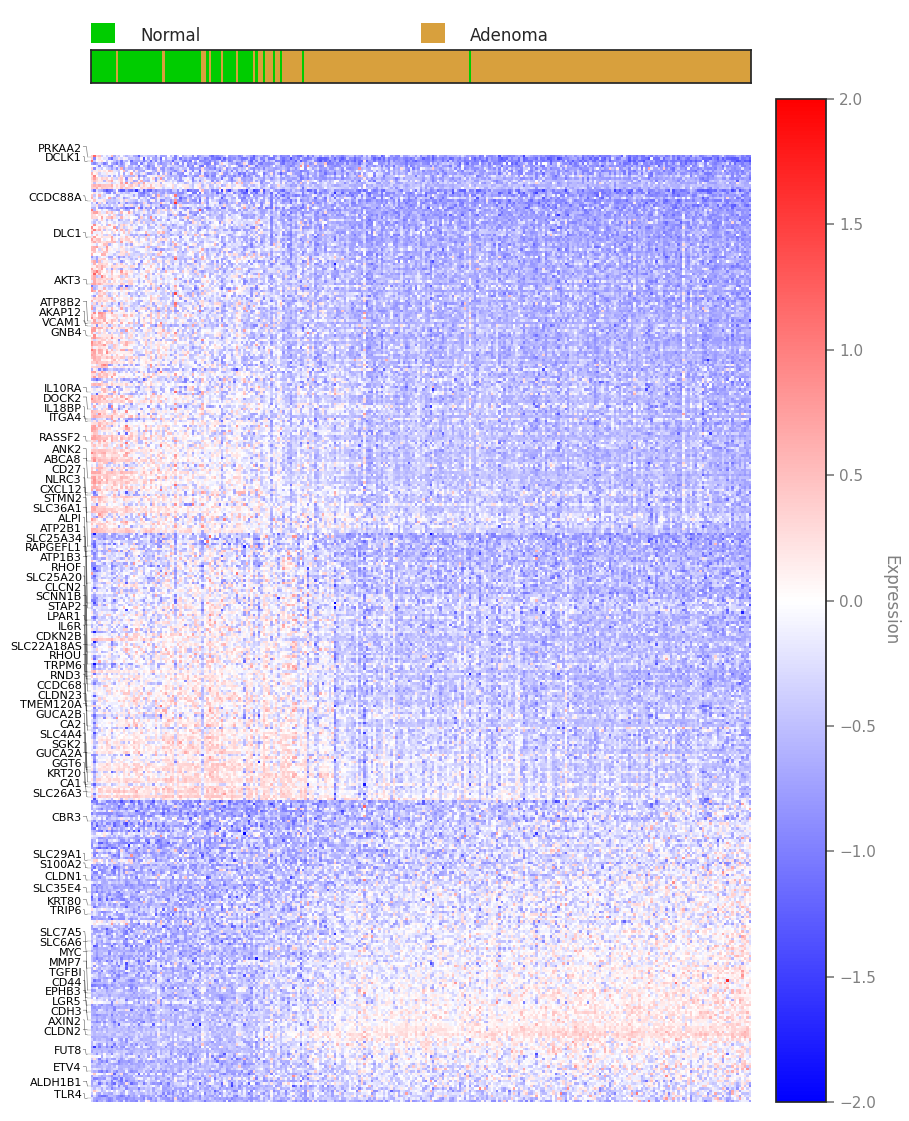

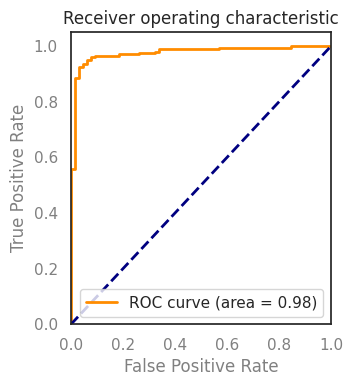

In [50]:
reload(bone)
reload(mu)
ana = mu.PolypAnalysis()
ana.getReumers()

# Cluster 1-2-3-4-5
order = [1, 2, 3, 4, 5]
wt1 = [-5, -0.3, 0.1, 2.9, -4]
genes, wt1, l1 = mu.getGeneGroups2(order, wt1, 0)

ana.orderData2(l1, wt1)
ofile = "results/S4-heatmap-N-A.pdf"
params = {'dx': 10, 'dy': 10, 'spaceAnn': len(ana.order)/len(ana.atypes),
          'tAnn': 10, 'widthAnn':10, 'acolor' : acolor,
          'sy': 4, 'thr': 1, 'w': 12, 'h': 12, 
         'acolor': acolor,
          'atypes': ana.atypes,'cval': ana.cval}
genes = bone.readGenes("Supplementary/cluster-names.txt")
ana.printHeatmap3(ofile, genes, params)
plt.show()

## Supplementary Figure 5

**Heatmap of validation cohort 3: GSE77953 with C1-2-3-4-5**

Qu 2016 Normal Adenoma Cancer (n = 58)
GSE77953 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP50
30 [13, 17] GSE77953 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP50 PLP50
[0, 16, 152, 130, 122, 29, 406, 1530, 775, 33, 25, 9, 36, 516, 153, 188]
[16, 152, 130, 122, 29]
[-5, -0.3, 0.1, 2.9, -4]
1.9654088050314558 6.333943833943786
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
              precision    recall  f1-score   support

      Normal       0.76      1.00      0.87        13
         IBD       1.00      0.76      0.87        17

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.87        30
weighted avg       0.90      0.87      0.87        30

ROC AUC 0.9773755656108597
ROC AUC 0.9773755656108597
Accuracy 0.8666666666666667
x      False  True 
y                  
False     1

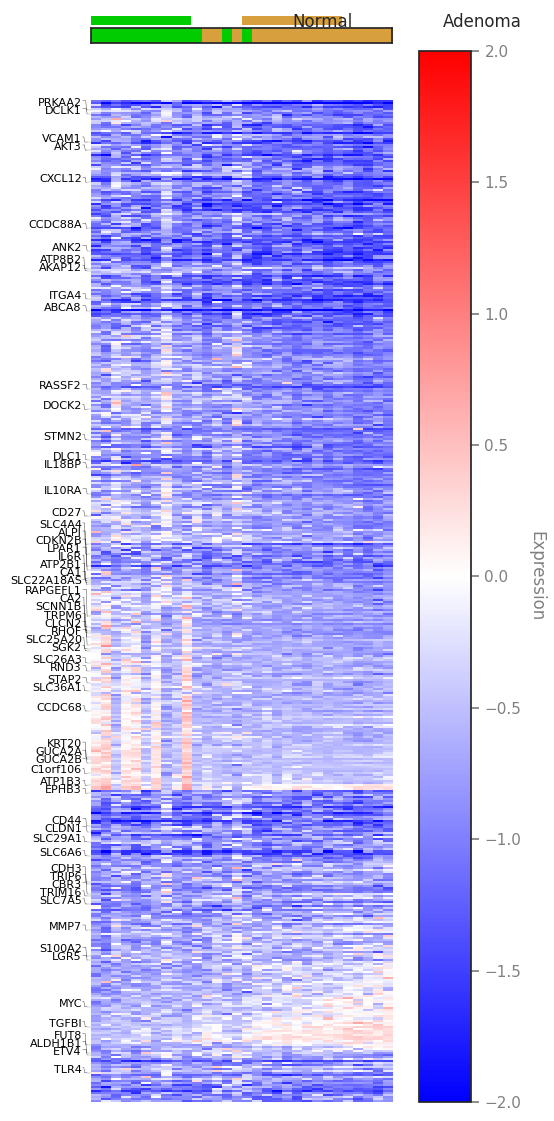

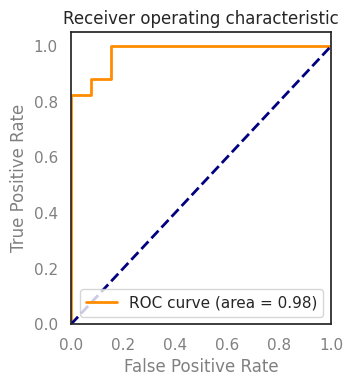

In [45]:
reload(bone)
reload(mu)
ana = mu.PolypAnalysis()
ana.getQu()

# Cluster 1-2-3-4-5
order = [1, 2, 3, 4, 5]
wt1 = [-5, -0.3, 0.1, 2.9, -4]
genes, wt1, l1 = mu.getGeneGroups2(order, wt1, 0)

ana.orderData2(l1, wt1)
ofile = "results/S5-heatmap-N-A.pdf"
params = {'dx': 50, 'dy': 10, 'spaceAnn': len(ana.order)/len(ana.atypes),
          'tAnn': 10, 'widthAnn':10, 'acolor' : acolor,
          'sy': 4, 'thr': 1, 'w': 12, 'h': 12, 
         'acolor': acolor,
          'atypes': ana.atypes,'cval': ana.cval}
genes = bone.readGenes("Supplementary/cluster-names.txt")
ana.printHeatmap3(ofile, genes, params)
plt.show()

## Supplementary Figure 6

**Supplementary 6A: violin plot for qRT-PCR on colon tissue (healthy, non-involved, polyp)**

qPCR CRC tissues Fusoboolean 2021 (- edit) (n = 18)
 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG15
18 [3, 11, 4]  http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG15 PG15
[2, 4]
[2, 4]


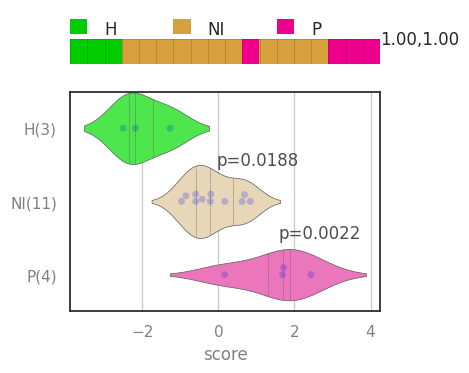

In [11]:
import bone
reload(bone)
reload(mu)
ana = mu.PolypAnalysis()
ana.getqPCR_Hs_tissue_NI_P(tn=1)

l1 = [['PRKAA2', 'ChgA'], ['IL-8', 'CLDN-2', 'CEMIP', 'Lgr-5']]
wt1 = [-1, 1]
ana.orderData(l1, wt1)
fig = mu.processData(ana, l1, wt1, None, 1)

**Supplementary 6B: violin plot and heatmap for qRT-PCR on colon tissue (non-involved by disease)**

qPCR CRC tissues Fusoboolean 2021 (- edit) (n = 18)
 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG15
11 [3, 2, 2, 4]  http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG15 PG15
[2, 4]
[2, 4]
1.6606280193236582 0.5081300813008128


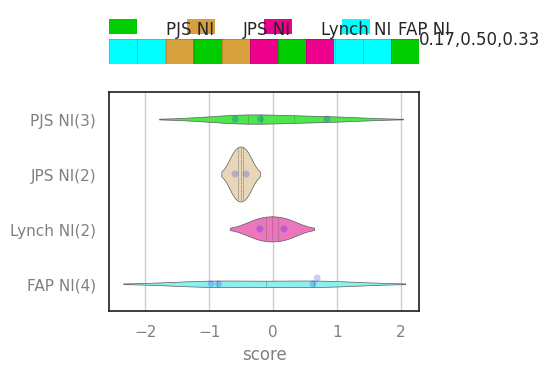

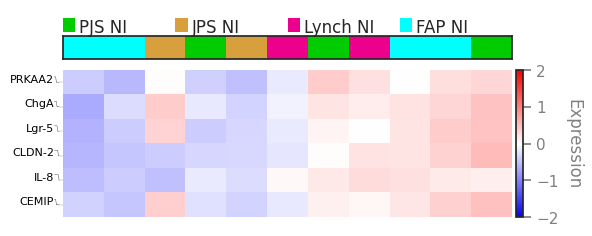

In [12]:
ana = mu.PolypAnalysis()
ana.getqPCR_Hs_tissue_NI_P(tn=3)

l1 = [['PRKAA2', 'ChgA'], ['IL-8', 'CLDN-2', 'CEMIP', 'Lgr-5']]
wt1 = [-1, 1]
ana.orderData(l1, wt1)

fig = mu.processData(ana, l1, wt1, None, 1)

genes = ['ChgA', 'PRKAA2', 'IL-8', 'Lgr-5', 'CEMIP', 'CLDN-2']

ofile = "results/S6B-heatmap-qPCR-tissue-NI.pdf"

params = {'dx': 50, 'dy': 30, 'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': .1, 'widthAnn':.3,
          'sy': 1, 'thr': 1, 'w': 6, 'h': 6,
          'genes': genes,
          'atypes': ana.atypes,'cval': ana.cval}

ana.params.update(params)
ax, divider = bone.plotHeatmap(ofile, ana.data, ana.col_labels,
        ana.row_labels, ana.params)

**Supplementary 6C: violin plot and heatmap for qRT-PCR on colon tissue (JPS noninvolved vs polyp)**

qPCR CRC tissues Fusoboolean 2021 (- edit) (n = 18)
 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG15
4 [2, 2]  http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG15 PG15
[2, 4]
[2, 4]
0.6038647342995176 0.2540650406504064


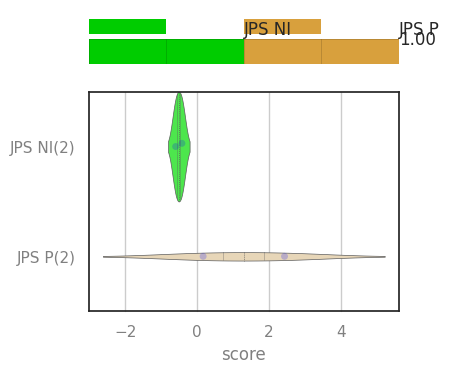

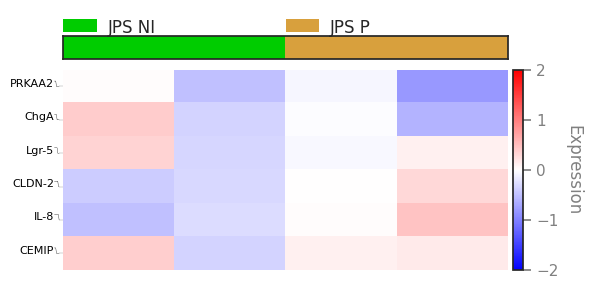

In [13]:
ana = mu.PolypAnalysis()
ana.getqPCR_Hs_tissue_NI_P(tn=4)

l1 = [['PRKAA2', 'ChgA'], ['IL-8', 'CLDN-2', 'CEMIP', 'Lgr-5']]
wt1 = [-1, 1]
ana.orderData(l1, wt1)

fig = mu.processData(ana, l1, wt1, None, 1)
    
genes = ['ChgA', 'PRKAA2', 'IL-8', 'Lgr-5', 'CEMIP', 'CLDN-2']

ofile = "results/S6C-heatmap-qPCR-tissue-JPS.pdf"

params = {'dx': 50, 'dy': 15, 'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': .1, 'widthAnn':.3,
          'sy': 1, 'thr': 1, 'w': 6, 'h': 6,
          'genes': genes,
          'atypes': ana.atypes,'cval': ana.cval}

ana.params.update(params)
ax, divider = bone.plotHeatmap(ofile, ana.data, ana.col_labels,
        ana.row_labels, ana.params)

**Supplementary 6D: violin plot and heatmap for qRT-PCR on colon tissue (FAP noninvolved vs polyp)**

qPCR CRC tissues Fusoboolean 2021 (- edit) (n = 18)
 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG15
6 [4, 2]  http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG15 PG15
[2, 4]
[2, 4]
0.9057971014492766 0.33875338753387524


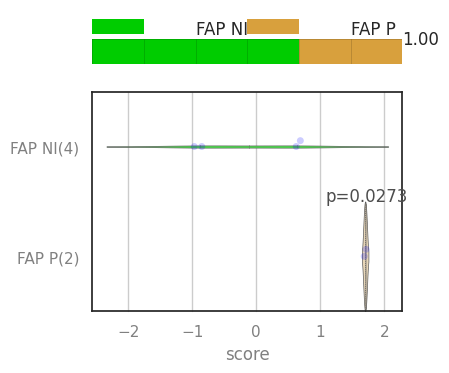

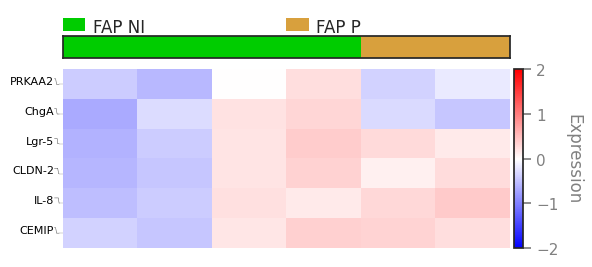

In [14]:
ana = mu.PolypAnalysis()
ana.getqPCR_Hs_tissue_NI_P(tn=5)

l1 = [['PRKAA2', 'ChgA'], ['IL-8', 'CLDN-2', 'CEMIP', 'Lgr-5']]
wt1 = [-1, 1]
ana.orderData(l1, wt1)

fig = mu.processData(ana, l1, wt1, None, 1)
    
genes = ['ChgA', 'PRKAA2', 'IL-8', 'Lgr-5', 'CEMIP', 'CLDN-2']

ofile = "results/S6D-heatmap-qPCR-tissue-FAP.pdf"

params = {'dx': 50, 'dy': 20, 'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': .1, 'widthAnn':.3,
          'sy': 1, 'thr': 1, 'w': 6, 'h': 6,
          'genes': genes,
          'atypes': ana.atypes,'cval': ana.cval}

ana.params.update(params)
ax, divider = bone.plotHeatmap(ofile, ana.data, ana.col_labels,
        ana.row_labels, ana.params)

## Supplementary Figure 7

**Supplementary 7: violin plot and heatmap for RNA-seq on pediatric colon tissue (noninvolved vs polyp)**

Polyp - Fusoboolean Human 2020 (n = 12)
 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG0.5
7 [3, 4]  http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG0.5 PG0.5
[0, 16, 152, 130, 122, 29, 406, 1530, 775, 33, 25, 9, 36, 516, 153, 188]
[16, 152, 130, 122, 29]
[-5, -0.3, 0.1, 2.9, -4]
[15, 152, 121, 107, 27]
[15, 152, 121, 107, 27]
3.391472868217096 11.912827461607655


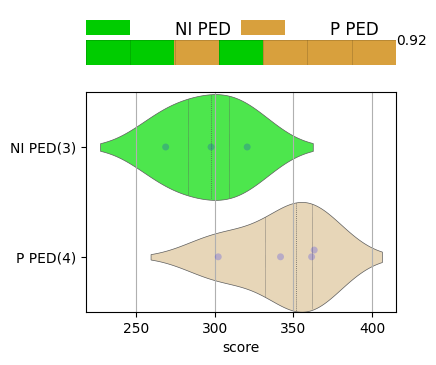

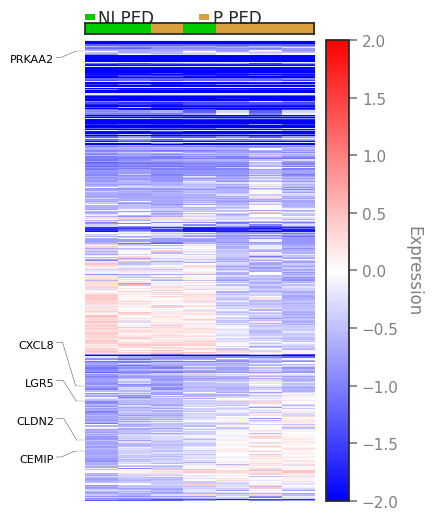

In [16]:
import bone
reload(bone)
reload(mu)
ana = mu.PolypAnalysis()
ana.getRNASeq_Hs_tissue_NI_P(6)

# Cluster 1-2-3-4-5
order = [1, 2, 3, 4, 5]
wt1 = [-5, -0.3, 0.1, 2.9, -4]
genes, wt1, l1 = mu.getGeneGroups2(order, wt1, 0)
l1[3].add('CEMIP')
l1[3].add('CXCL8')
ana.orderData(l1, wt1)
fig = mu.processData(ana, l1, wt1, None, 1)

# Heatmap
genes = ['PRKAA2', 'CHGA', 'CLDN2', 'CXCL8', 'CEMIP', 'LGR5']

ofile = "results/S7-heatmap-RNAseq-tissue-ped-1-2-3-4-5.pdf"

params = {'dx': 300, 'dy': 10, 'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': .1, 'widthAnn':.3,
          'sy': 35, 'thr': 0.5, 'w': 10, 'h': 6,
          'genes': genes,
          'atypes': ana.atypes,'cval': ana.cval,
          'tl': 6, 'tw': 0.25, 'ts': 10, 'tsi': -100}

ana.params.update(params)
ax, divider = bone.plotHeatmap(ofile, ana.data, ana.col_labels,
        ana.row_labels, ana.params)

[0, 16, 152, 130, 122, 29, 406, 1530, 775, 33, 25, 9, 36, 516, 153, 188]
[122]
[1]
[107]
[107]
1.0567632850241526 3.020551038843726


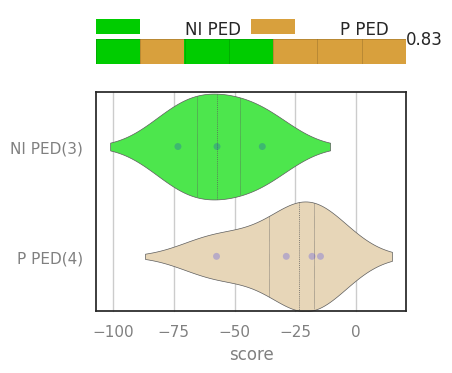

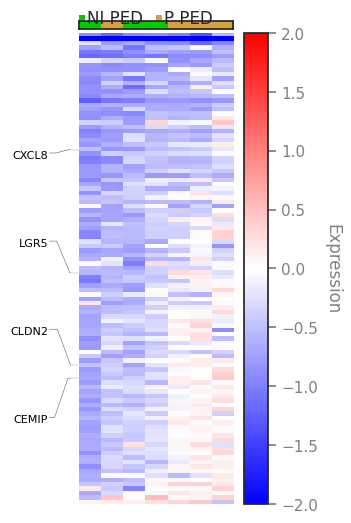

In [16]:
# Cluster 4
order = [4]
wt1 = [1]
genes, wt1, l1 = mu.getGeneGroups2(order, wt1, 0)
l1[0].add('CEMIP')
l1[0].add('CXCL8')
ana.orderData(l1, wt1)
fig = mu.processData(ana, l1, wt1, None, 1)

# Heatmap
genes = ['PRKAA2', 'CCDC88A', 'CLDN2', 'CXCL8', 'CEMIP', 'LGR5']

ofile = "results/S7-heatmap-RNAseq-tissue-ped-4.pdf"

params = {'dx': 50, 'dy': 10, 'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': .1, 'widthAnn':.3,
          'sy': 20, 'thr': 0.5, 'w': 6, 'h': 6,
          'genes': genes,
          'atypes': ana.atypes,'cval': ana.cval,
          'tl': 6, 'tw': 0.25, 'ts': 10, 'tsi': -100}

ana.params.update(params)
ax, divider = bone.plotHeatmap(ofile, ana.data, ana.col_labels,
        ana.row_labels, ana.params)

## Supplementary Figure 8

**Supplementary 8: violin plots for RNA-seq on organoids (FAP noninvolved vs polyp)**

Polyp - Fusoboolean Human 2020 (n = 12)
 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG0.5
4 [1, 3]  http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG0.5 PG0.5
[0, 16, 152, 130, 122, 29, 406, 1530, 775, 33, 25, 9, 36, 516, 153, 188]
[16, 152, 130, 122, 29]
[-5, -0.3, 0.1, 2.9, -4]
[15, 152, 121, 105, 27]


/booleanfs2/sahoo/BoNE/bone.py:2105: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t, p = ttest_ind(lval[0],lval[i], equal_var=False)
/booleanfs2/sahoo/Data/Daniella/miniconda3/envs/python-env-2023.4/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/booleanfs2/sahoo/Data/Daniella/miniconda3/envs/python-env-2023.4/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


[0, 16, 152, 130, 122, 29, 406, 1530, 775, 33, 25, 9, 36, 516, 153, 188]
[16, 152, 122]
[-2, -1, 1]
[15, 152, 105]


/booleanfs2/sahoo/BoNE/bone.py:2105: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t, p = ttest_ind(lval[0],lval[i], equal_var=False)
/booleanfs2/sahoo/Data/Daniella/miniconda3/envs/python-env-2023.4/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/booleanfs2/sahoo/Data/Daniella/miniconda3/envs/python-env-2023.4/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


[0, 16, 152, 130, 122, 29, 406, 1530, 775, 33, 25, 9, 36, 516, 153, 188]
[122]
[1]
[105]


/booleanfs2/sahoo/BoNE/bone.py:2105: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t, p = ttest_ind(lval[0],lval[i], equal_var=False)
/booleanfs2/sahoo/Data/Daniella/miniconda3/envs/python-env-2023.4/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/booleanfs2/sahoo/Data/Daniella/miniconda3/envs/python-env-2023.4/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/booleanfs2/sahoo/BoNE/bone.py:2105: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t, p = ttest_ind(lval[0],lval[

[2, 3]


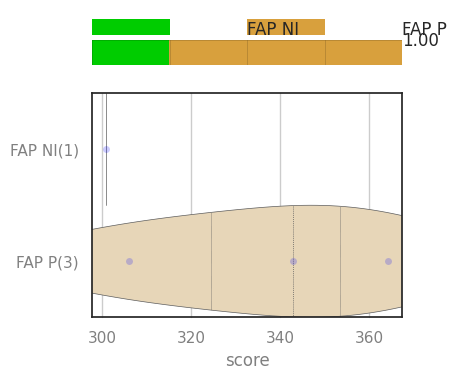

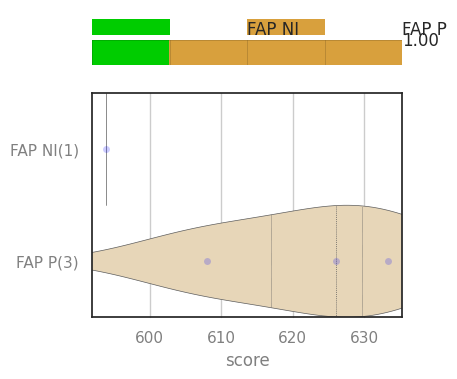

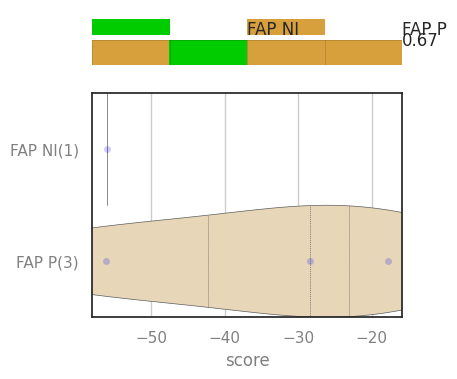

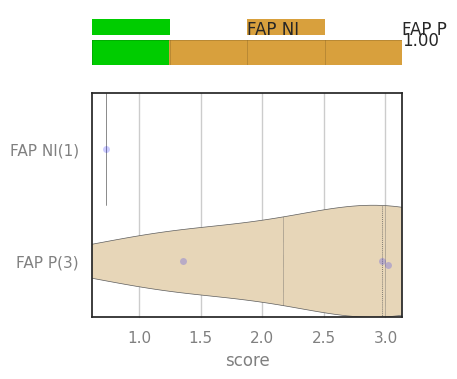

In [62]:
import bone
reload(bone)
reload(mu)
ana = mu.PolypAnalysis()
ana.getRNASeq_Hs_tissue_NI_P(7)

# Cluster 1-2-3-4-5
order = [1, 2, 3, 4, 5]
wt1 = [-5, -0.3, 0.1, 2.9, -4]
genes, wt1, l1 = mu.getGeneGroups2(order, wt1, 0)
fig = mu.processData(ana, l1, wt1, None, 1)

# Cluster 1-2-4
order = [1, 2, 4]
wt1 = [-2, -1, 1]
genes, wt1, l1 = mu.getGeneGroups2(order, wt1, 0)
fig = mu.processData(ana, l1, wt1, None, 1)


# Cluster 4
order = [4]
wt1 = [1]
genes, wt1, l1 = mu.getGeneGroups2(order, wt1, 0)
fig = mu.processData(ana, l1, wt1, None, 1)


# MACS genes
c1 = ['PRKAA2', 'CGA']
c2 = ['CEMIP', 'LGR55', 'CXCL8', 'CLDN2']
l1 = [c1, c2]
wt1 = [-1, 1]
fig = mu.processData(ana, l1, wt1, None, 1)

## Supplementary Figure 11

**Pool samples only**

Iftekhar 2020 mouse colorectal cancer organoids (n = 10)
GSE140929 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG19
5 [2, 3] GSE140929 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG19 PG19
[0, 16, 152, 130, 122, 29, 406, 1530, 775, 33, 25, 9, 36, 516, 153, 188]
[16, 152, 130, 122, 29]
[-5, -0.3, 0.1, 2.9, -4]
[15, 140, 115, 104, 24]
[0, 16, 152, 130, 122, 29, 406, 1530, 775, 33, 25, 9, 36, 516, 153, 188]
[122]
[1]
[104]


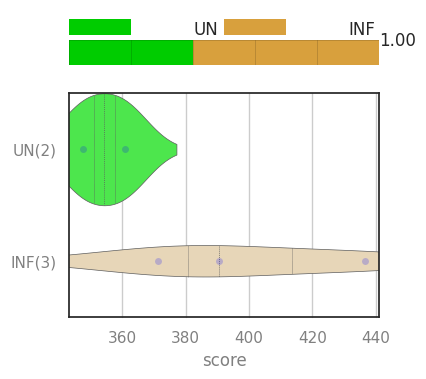

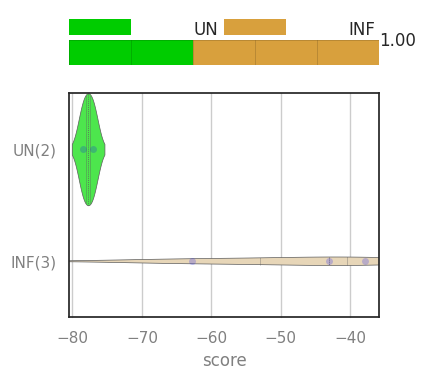

In [66]:
reload(bone)
reload(mu)
ana = mu.PolypAnalysis()

ana.getIftekhar2020(1)

# Cluster 1-2-3-4-5
order = [1, 2, 3, 4, 5]
wt1 = [-5, -0.3, 0.1, 2.9, -4]
genes, wt1, l1 = mu.getGeneGroups2(order, wt1, 0)
ana.convertMm(l1, [])
fig = bone.processData(ana, ana.gene_groups, wt1, None, 1)

# Cluster 4
order = [4]
wt1 = [1]
genes, wt1, l1 = mu.getGeneGroups2(order, wt1, 0)
ana.convertMm(l1, [])
fig = bone.processData(ana, ana.gene_groups, wt1, None, 1)

**Combined pool and clone samples**

Iftekhar 2020 mouse colorectal cancer organoids (n = 10)
GSE140929 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG19
10 [4, 6] GSE140929 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG19 PG19
[0, 16, 152, 130, 122, 29, 406, 1530, 775, 33, 25, 9, 36, 516, 153, 188]
[16, 152, 130, 122, 29]
[-5, -0.3, 0.1, 2.9, -4]
[15, 140, 115, 104, 24]
[0, 16, 152, 130, 122, 29, 406, 1530, 775, 33, 25, 9, 36, 516, 153, 188]
[122]
[1]
[104]


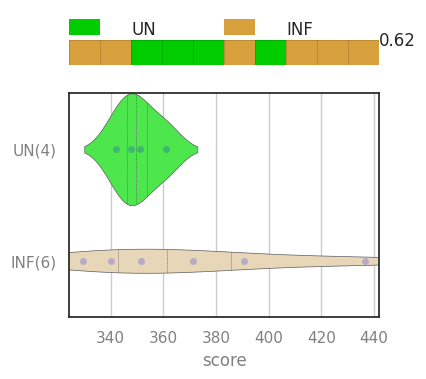

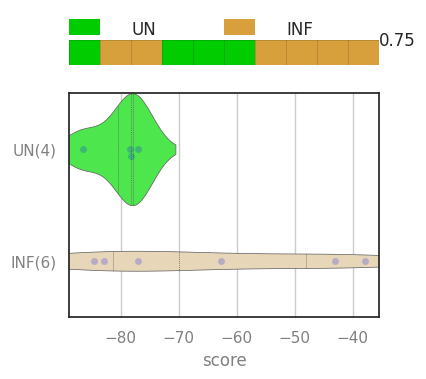

In [67]:
reload(bone)
reload(mu)
ana = mu.PolypAnalysis()

ana.getIftekhar2020(2)

# Cluster 1-2-3-4-5
order = [1, 2, 3, 4, 5]
wt1 = [-5, -0.3, 0.1, 2.9, -4]
genes, wt1, l1 = mu.getGeneGroups2(order, wt1, 0)
ana.convertMm(l1, [])
fig = bone.processData(ana, ana.gene_groups, wt1, None, 1)

# Cluster 4
order = [4]
wt1 = [1]
genes, wt1, l1 = mu.getGeneGroups2(order, wt1, 0)
ana.convertMm(l1, [])
fig = bone.processData(ana, ana.gene_groups, wt1, None, 1)

**Separate pool and clone samples**

Iftekhar 2020 mouse colorectal cancer organoids (n = 10)
GSE140929 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG19
10 [2, 3, 2, 3] GSE140929 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG19 PG19
[0, 16, 152, 130, 122, 29, 406, 1530, 775, 33, 25, 9, 36, 516, 153, 188]
[16, 152, 130, 122, 29]
[-5, -0.3, 0.1, 2.9, -4]
[15, 140, 115, 104, 24]
[0, 16, 152, 130, 122, 29, 406, 1530, 775, 33, 25, 9, 36, 516, 153, 188]
[122]
[1]
[104]


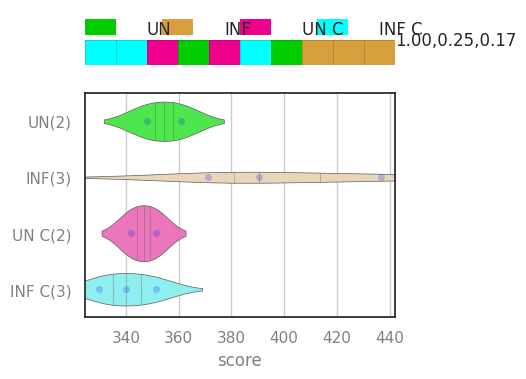

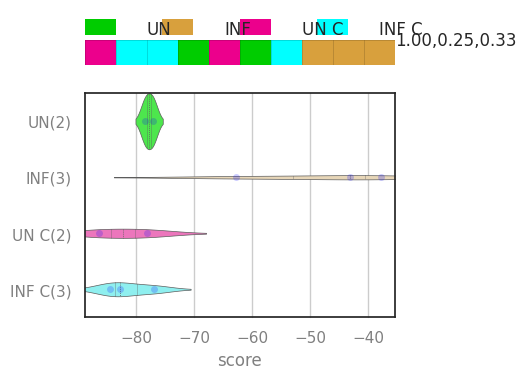

In [68]:
reload(bone)
reload(mu)
ana = mu.PolypAnalysis()

ana.getIftekhar2020(3)

# Cluster 1-2-3-4-5
order = [1, 2, 3, 4, 5]
wt1 = [-5, -0.3, 0.1, 2.9, -4]
genes, wt1, l1 = mu.getGeneGroups2(order, wt1, 0)
ana.convertMm(l1, [])
fig = bone.processData(ana, ana.gene_groups, wt1, None, 1)

# Cluster 4
order = [4]
wt1 = [1]
genes, wt1, l1 = mu.getGeneGroups2(order, wt1, 0)
ana.convertMm(l1, [])
fig = bone.processData(ana, ana.gene_groups, wt1, None, 1)

## Supplementary Figure 12

**Heatmaps for uninfected vs infected**

Caco-2 Treatments GPL571 (n = 17)
GEO http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC142
9 [3, 3, 3] GEO http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC142 CRC142
[0, 16, 152, 130, 122, 29, 406, 1530, 775, 33, 25, 9, 36, 516, 153, 188]
[16, 152, 130, 122, 29]
[-5, -0.3, 0.1, 2.9, -4]
5.434782608695558 6.639194139194058
[0, 0, 0, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1, 1, 1]
              precision    recall  f1-score   support

      Normal       0.75      1.00      0.86         3
         IBD       1.00      0.83      0.91         6

    accuracy                           0.89         9
   macro avg       0.88      0.92      0.88         9
weighted avg       0.92      0.89      0.89         9

ROC AUC 1.0
ROC AUC 1.0
Accuracy 0.8888888888888888
x      False  True 
y                  
False      3      0
True       1      5
SignificanceResult(statistic=inf, pvalue=0.04761904761904762)
Fisher Exact pvalue = 0.04761904761904762


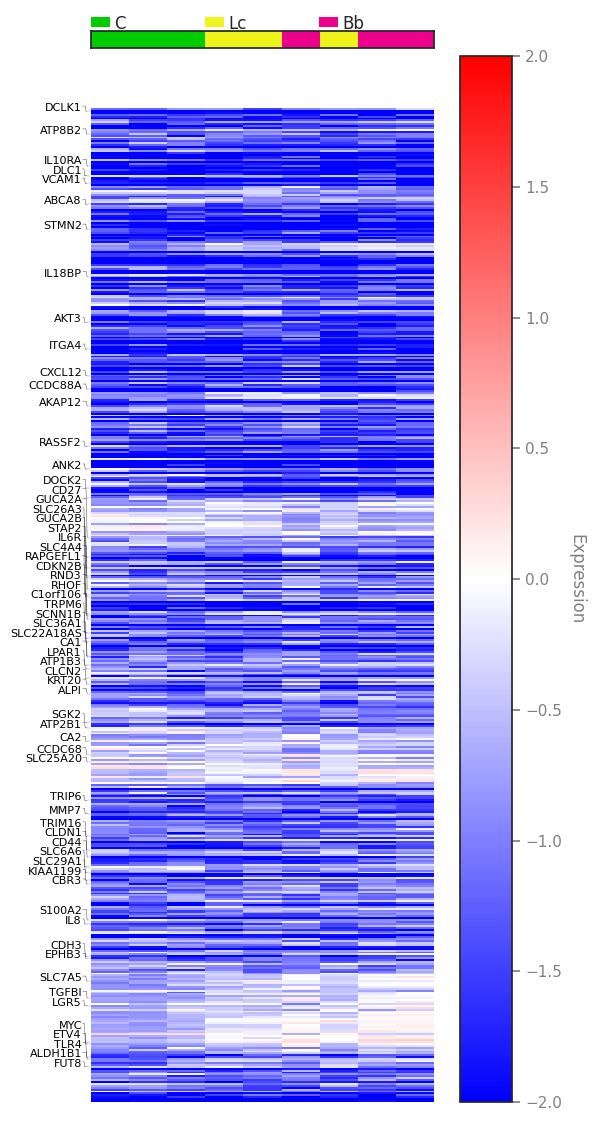

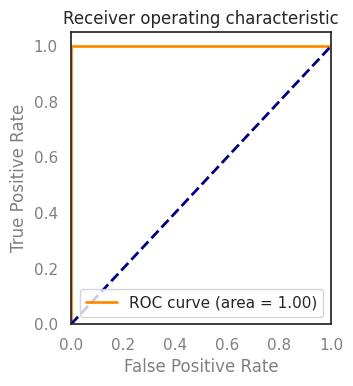

In [69]:
### reload(bone)
reload(mu)
ana = mu.PolypAnalysis()
ana.getMatsuki()

# Cluster 1-2-3-4-5
order = [1, 2, 3, 4, 5]
wt1 = [-5, -0.3, 0.1, 2.9, -4]
genes, wt1, l1 = mu.getGeneGroups2(order, wt1, 0)
ana.orderData2(l1, wt1)
ofile = "results/S12-heatmap-Lactobacillus.pdf"
params = {'dx': 200, 'dy': 10, 'spaceAnn': len(ana.order)/len(ana.atypes), 'widthAnn': 0.5, 'tAnn': 0.1,
          'sy': 5, 'thr': 0, 'w': 6, 'h': 12}
#genes = readGenes("cluster-names.txt")
ana.printHeatmap3(ofile, genes, params)
plt.show()

Caco-2 Treatments GPL570 (n = 132)
GEO http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC141
18 [6, 6, 6] GEO http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC141 CRC141
[0, 16, 152, 130, 122, 29, 406, 1530, 775, 33, 25, 9, 36, 516, 153, 188]
[16, 152, 130, 122, 29]
[-5, -0.3, 0.1, 2.9, -4]
10.869565217391116 12.896825396825017
[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00         6
         IBD       0.45      0.42      0.43        12

    accuracy                           0.28        18
   macro avg       0.23      0.21      0.22        18
weighted avg       0.30      0.28      0.29        18

ROC AUC 0.31944444444444453
ROC AUC 0.31944444444444453
Accuracy 0.2777777777777778
x      False  True 
y                  
False      0      6
True       7      5
(0.0, 0.03770739064856711)
Fisher Exact pvalue = 0.0

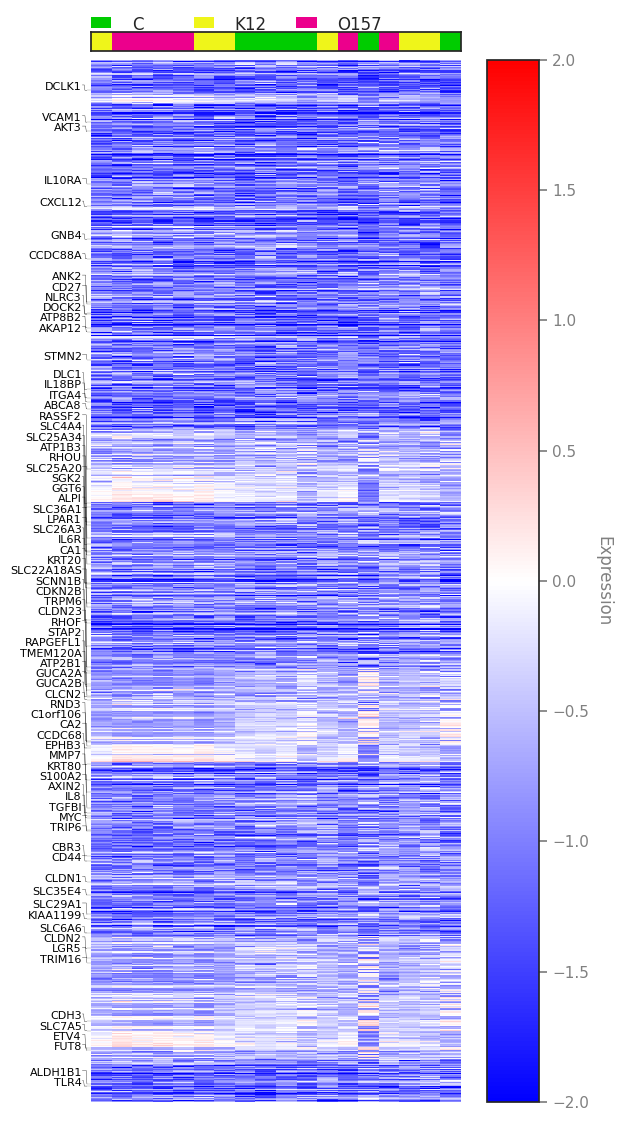

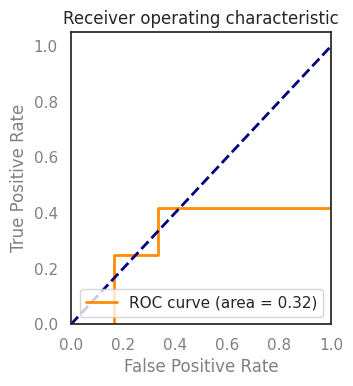

In [63]:
reload(bone)
reload(mu)
ana = mu.PolypAnalysis()
ana.getEColi()

# Cluster 1-2-3-4-5
order = [1, 2, 3, 4, 5]
wt1 = [-5, -0.3, 0.1, 2.9, -4]
genes, wt1, l1 = mu.getGeneGroups2(order, wt1, 0)
ana.orderData2(l1, wt1)
ofile = "results/S12-heatmap-Ecoli.pdf"
params = {'dx': 200, 'dy': 10, 'spaceAnn': 5, 'widthAnn': 1, 'sy': 10, 'thr': 1,
         'w': 6, 'h': 12}
#genes = readGenes("cluster-names.txt")
ana.printHeatmap3(ofile, genes, params)
plt.show()

Caco-2 Treatments GPL96 (n = 16)
GEO http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC143
8 [2, 2, 2, 2] GEO http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC143 CRC143
[0, 16, 152, 130, 122, 29, 406, 1530, 775, 33, 25, 9, 36, 516, 153, 188]
[16, 152, 130, 122, 29]
[-5, -0.3, 0.1, 2.9, -4]
4.830917874396231 6.639194139194058
[1, 1, 1, 1, 0, 1, 1, 0]
[0, 0, 0, 1, 1, 1, 1, 1]
              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00         2
         IBD       0.60      0.50      0.55         6

    accuracy                           0.38         8
   macro avg       0.30      0.25      0.27         8
weighted avg       0.45      0.38      0.41         8

ROC AUC 0.16666666666666666
ROC AUC 0.16666666666666666
Accuracy 0.375
x      False  True 
y                  
False      0      2
True       3      3
(0.0, 0.46428571428571364)
Fisher Exact pvalue = 0.46428571428571364


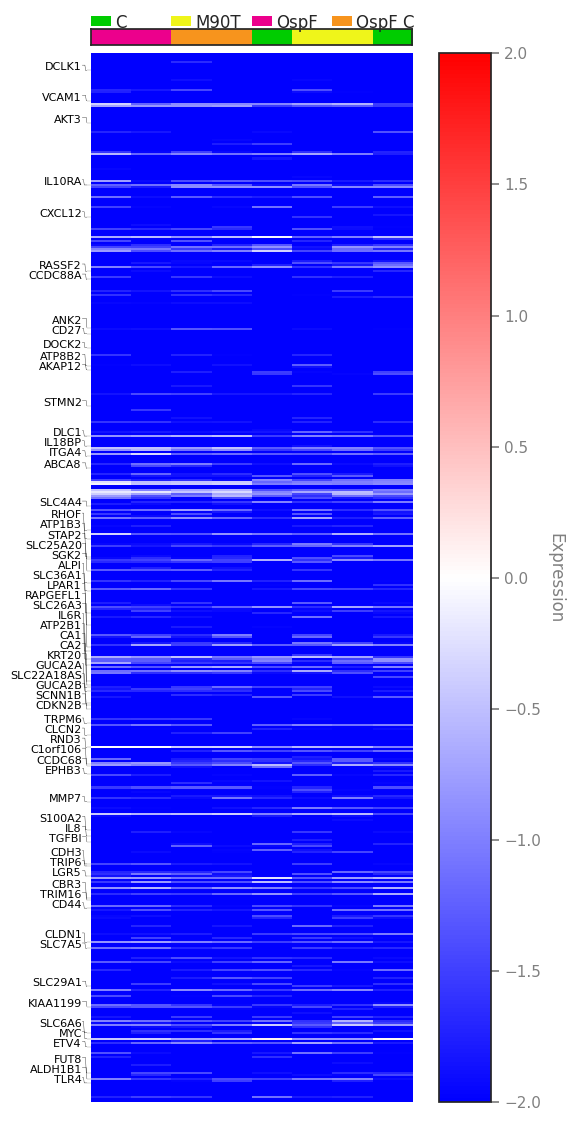

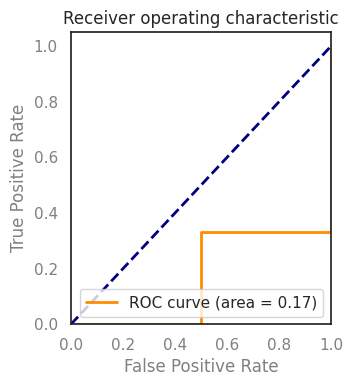

In [55]:
reload(bone)
reload(mu)
ana = mu.PolypAnalysis()
ana.getArbibe()

# Cluster 1-2-3-4-5
order = [1, 2, 3, 4, 5]
wt1 = [-5, -0.3, 0.1, 2.9, -4]
genes, wt1, l1 = mu.getGeneGroups2(order, wt1, 0)
ana.orderData2(l1, wt1)
ofile = "results/S12-heatmap-Shigella.pdf"
params = {'dx': 200, 'dy': 10, 'spaceAnn': len(ana.order)/len(ana.atypes), 'widthAnn': 0.5, 'tAnn': 0.1,
          'sy': 5, 'thr': 0, 'w': 6, 'h': 12}
#genes = readGenes("cluster-names.txt")
ana.printHeatmap3(ofile, genes, params)
plt.show()